# Problem Statement
Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London,UK.

Blossom Bank wants to build a Machine Learning model to predict online payment fraud. With this model they are expected to make less False Negatives with regards to detecting fraudulent transactions.


# Project Objective
- Visualize the relationships of the columns within the dataset (EDA).
- Find out what machine learning (ML) model will detect frauds better.
- Decide which confusion matrix metric is important for deciding the model.

In [1]:
#IMPORTING ALL THE RELEVANT LIBRARIES
import pandas as pd
import numpy as np

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data Dictionary

• step: represents a unit of time where 1 step equals 1 hour

• type: type of online transaction

• amount: the amount of the transaction

• nameOrig: customer starting the transaction

• oldbalanceOrg: balance before the transaction

• newbalanceOrig: balance after the transaction

• nameDest: recipient of the transaction

• oldbalanceDest: initial balance of recipient before the transaction

• newbalanceDest: the new balance of the recipient after the transaction

• isFraud: fraud transaction (Target)

# Data Inspection

In [2]:
# Importing Spreadsheet
data = pd.read_csv(r'C:\Users\USER\Desktop\10alytics\ASSIGN\Online Payment Fraud Detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
# Glancing through the first 15 rows in the table
data.head(45)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [4]:
# Checking bottom 15 row data
data.tail(45)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048530,95,PAYMENT,24789.80,C1264566820,0.00,0.00,M46618313,0.00,0.00,0
1048531,95,PAYMENT,7269.38,C1021116124,0.00,0.00,M1840641602,0.00,0.00,0
1048532,95,PAYMENT,16711.51,C1489913650,0.00,0.00,M1619473404,0.00,0.00,0
1048533,95,PAYMENT,8407.51,C997595950,0.00,0.00,M2033450468,0.00,0.00,0
1048534,95,PAYMENT,35615.13,C1399771687,0.00,0.00,M179241829,0.00,0.00,0
1048535,95,PAYMENT,20254.60,C25937525,0.00,0.00,M1739708285,0.00,0.00,0
1048536,95,PAYMENT,792.83,C1122750022,0.00,0.00,M808274261,0.00,0.00,0
1048537,95,PAYMENT,28724.83,C1867155787,0.00,0.00,M111784416,0.00,0.00,0
1048538,95,PAYMENT,792.07,C447530637,0.00,0.00,M1074873196,0.00,0.00,0
1048539,95,PAYMENT,1600.07,C2066385652,0.00,0.00,M818348736,0.00,0.00,0


In [5]:
# Checking for null or missing values within each column
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
# Checking number of rows and columns
data.shape

(1048575, 10)

- So there are 1,048,575 rows and 10 columns

In [7]:
#Checking the type of data in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
# Finding out how many transactions per transaction type
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [9]:
#Checking unique transaction steps
data.step.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

In [10]:
# 19 hrs is the Mode Step
data.step.value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

In [11]:
#This hepls me check how many times step-95 occurs
data['step'].value_counts()[95]

2980

In [12]:
# Step Description: '''it has a minimum value of 1 hr, and maximum value of 95 hrs''' 
data.step.describe()

count    1.048575e+06
mean     2.696617e+01
std      1.562325e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.000000e+01
75%      3.900000e+01
max      9.500000e+01
Name: step, dtype: float64

In [13]:
# Finding out descriptions of transactions amount
data.amount.describe()

count    1.048575e+06
mean     1.586670e+05
std      2.649409e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      1.000000e+07
Name: amount, dtype: float64

In [14]:
# How many times was the max transaction amount done
data['amount'].value_counts()[10000000]

14

In [15]:

data.amount.min()

0.1

In [16]:
data.amount.max()

10000000.0

Checking the minimum and maximum transaction amount

In [17]:
# Categorizing seemingly valuable features to check their influence on Target
amount_fraud = data[['step', 'type', 'amount', 'isFraud' ]]
amount_fraud.head(15)

,step,type,amount,isFraud
0,1,PAYMENT,9839.64,0
1,1,PAYMENT,1864.28,0
2,1,TRANSFER,181.00,1
3,1,CASH_OUT,181.00,1
4,1,PAYMENT,11668.14,0
5,1,PAYMENT,7817.71,0
6,1,PAYMENT,7107.77,0
7,1,PAYMENT,7861.64,0
8,1,PAYMENT,4024.36,0
9,1,DEBIT,5337.77,0


In [18]:
amount_fraud.tail(15)

,step,type,amount,isFraud
1048560,95,CASH_IN,113412.53,0
1048561,95,DEBIT,7880.88,0
1048562,95,CASH_IN,37644.42,0
1048563,95,PAYMENT,9414.75,0
1048564,95,PAYMENT,5227.49,0
1048565,95,TRANSFER,132387.24,0
1048566,95,PAYMENT,12598.15,0
1048567,95,CASH_OUT,279674.05,0
1048568,95,PAYMENT,20721.54,0
1048569,95,PAYMENT,3210.11,0


It appears the type of transaction, and amount are valuable fraud indicators.

In [19]:
#Checking unique transaction types
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [20]:
#Checking unique transaction source
data.nameOrig.unique

<bound method Series.unique of 0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
1048570    C1179511630
1048571    C1956161225
1048572    C2037964975
1048573    C1633237354
1048574    C1264356443
Name: nameOrig, Length: 1048575, dtype: object>

In [21]:
#description of transaction source name
data.nameOrig.describe()

count         1048575
unique        1048317
top       C1214450722
freq                2
Name: nameOrig, dtype: object

- From here we can see that in the transaction origin or source, there are 1,048,317 unique names; meaning that the remaining 258 include repetitions.

In [22]:
#Checking unique transaction destination recipient
data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [23]:
data.nameDest.describe()

count        1048575
unique        449635
top       C985934102
freq              98
Name: nameDest, dtype: object

In [24]:
data.nameDest.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

From here we can see that in the transaction destination, only 449,635 are unique names or IDs. 

In [25]:
#Value counts for target
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [26]:
#Creating a copy to preserve the original file
df = data.copy()

Since there are no data to clean, we'll move into Exploratory Data Analysis (EDA).

### Renaming the columns

In [27]:
df.rename(columns = {'step':'time_step', 'type':'transact_type',
                              'amount':'transact_amount'}, inplace = True)

# Data Visualization

In this segment, I'd be visualizing the features to decode their influence or relevance with regards to fraud detection target.

## Univariate Analysis

In [28]:
df.head()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [29]:
df.tail()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


#### Time_Step

Text(0, 0.5, 'Count')

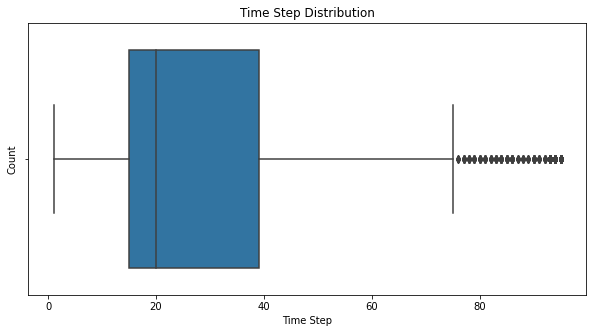

In [30]:
# Trying out a boxplot visualization for time_step without grouping
plt.figure(figsize=(10,5))
sns.boxplot(x= 'time_step', data = df)
plt.title('Time Step Distribution')
plt.xlabel('Time Step')
plt.ylabel('Count')


This boxplot doesn't seem to serve my visualization purpose.

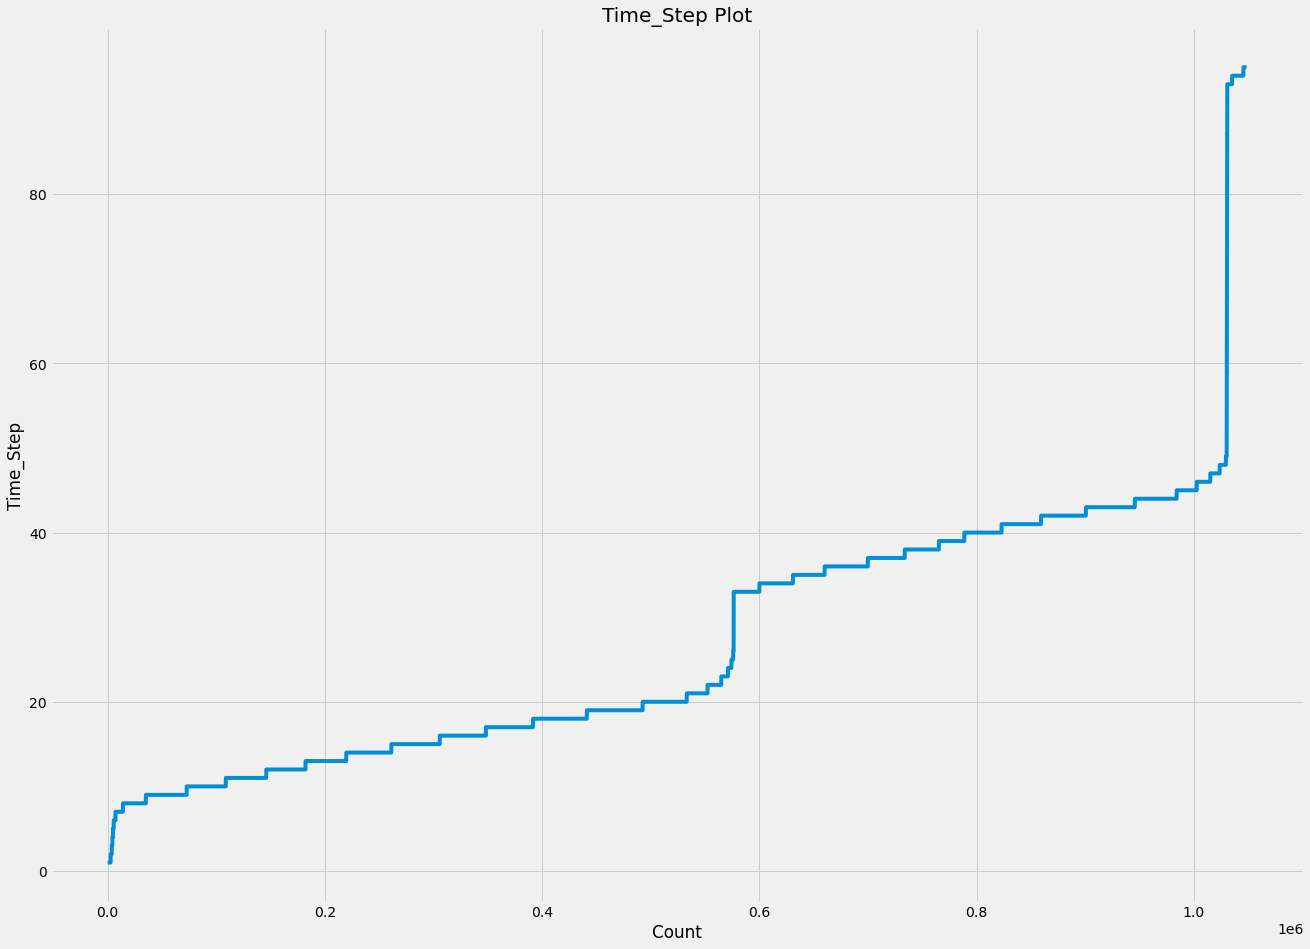

In [32]:
#Drawing a line plot to visualize the time_step column distribution
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(20, 15))
 
# Labelling the axes and setting
# a title
plt.xlabel("Count")
plt.ylabel("Time_Step")
plt.title("Time_Step Plot")
 
# plotting the "A" column alone
plt.plot(df["time_step"])

In [33]:
df['time_step'].value_counts()[1]

2708

In [34]:
df['time_step'].value_counts()[43]

45060

Recall that line graphs are normally utilized for visualizing time related data.

The horizontal axis is cumulative. 
- For example, time_step of 1 hr = 2708 counts 

* So if you add the value count of each time_step, you'll arrive at the total number of entry rows.

#### Transaction Type

Text(0, 0.5, 'Count')

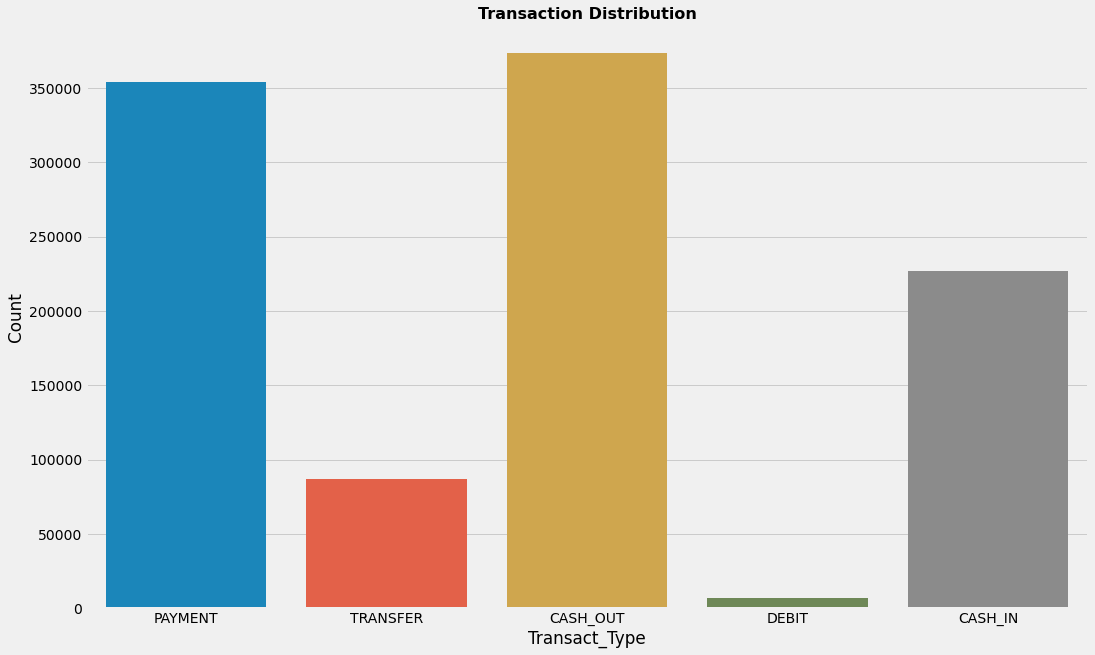

In [35]:
plt.figure(figsize=(16,10))
sns.countplot(x= 'transact_type', data = df)
plt.title('Transaction Distribution', weight = 'bold').set_fontsize('16')
plt.xlabel('Transact_Type')
plt.ylabel('Count')


In [36]:
df.transact_type.value_counts()['PAYMENT']

353873

In [37]:
df.transact_type.value_counts()['CASH_OUT']

373641

Cash out transactions are the most used by the blossom bank customers, followed by transfers.

#### Transaction Amount

Text(0, 0.5, 'Count')

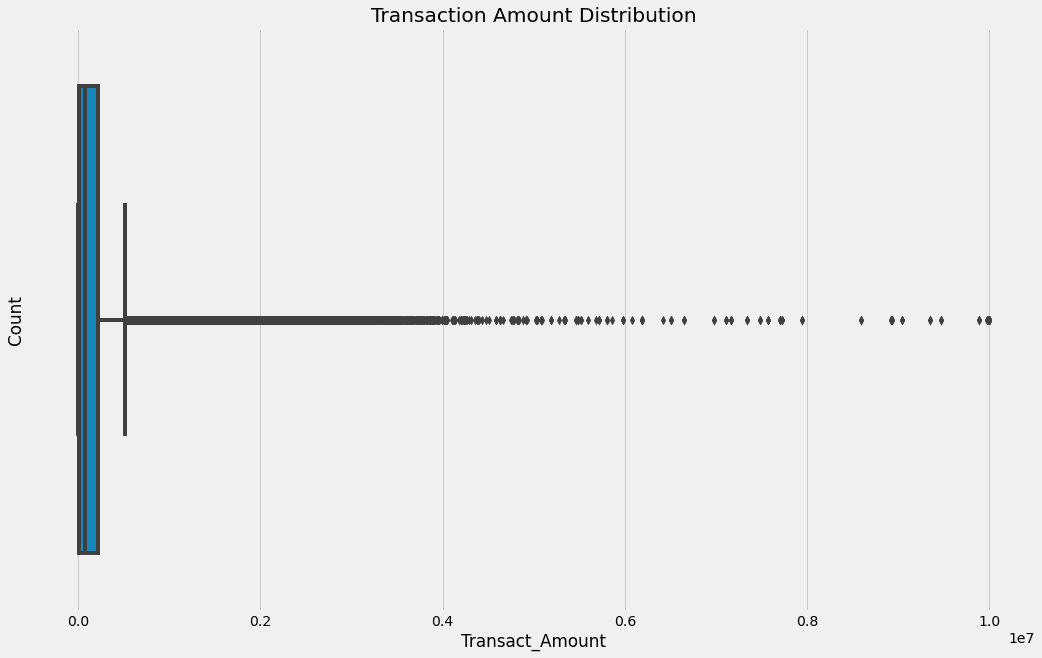

In [38]:
# Boxplot visualization for transaction amount
plt.figure(figsize=(16,10))
sns.boxplot(x= 'transact_amount', data = df)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transact_Amount')
plt.ylabel('Count')


In [39]:
df.transact_amount.describe()

count    1.048575e+06
mean     1.586670e+05
std      2.649409e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      1.000000e+07
Name: transact_amount, dtype: float64

10,000,000 is the highest transaction amount recorded, and 0.1 as least.

In [40]:
df.transact_amount.sum()

166374223863.37

So the total transaction amount recorded within this period is 166,374,223,863.37

In [41]:

# create a function to group the transaction amount
def amt(transact_amount):
    if transact_amount <= 2000000:
        return "<=2M"
    elif transact_amount <=4000000:
        return "<=4M"
    elif transact_amount <=6000000:
        return "<=6M"
    elif transact_amount <= 8000000:
        return "<=8M"
    else: 
        return ">8M"

    
# Create a new column for age category
df["transact_amount_grp"] = df["transact_amount"].apply(amt)

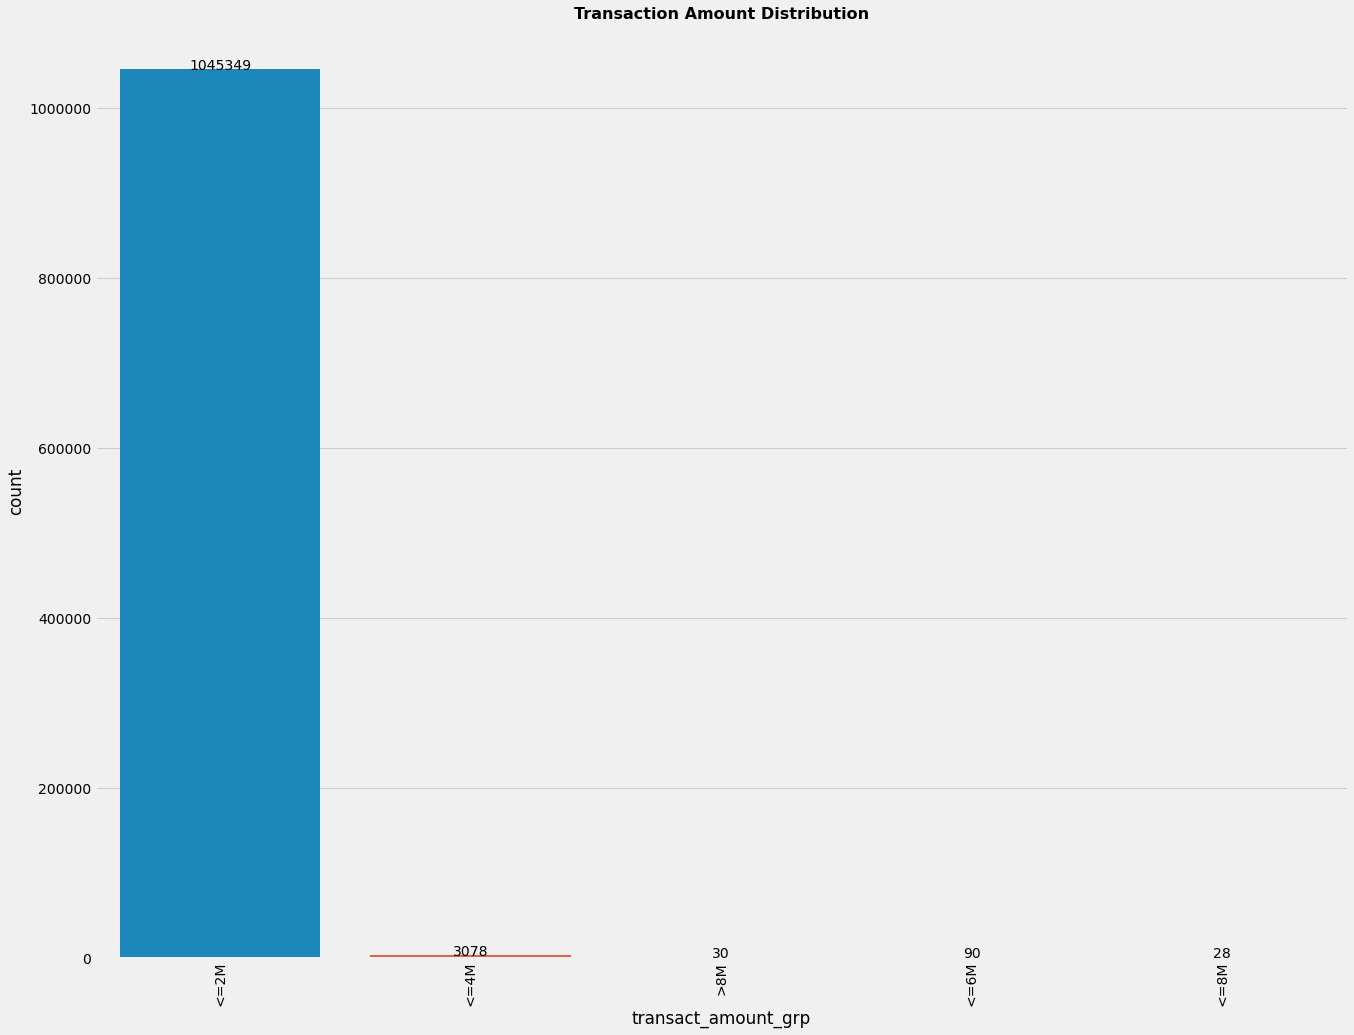

In [42]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "transact_amount_grp", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Transaction Amount Distribution', weight='bold').set_fontsize(16)

Most of the recorded transactions are under the 2 million range.

#### Sender's Old & New Account Balances

In [43]:
df.head()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,transact_amount_grp
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=2M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=2M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=2M
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=2M
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=2M


In [44]:
df.oldbalanceOrg.describe()

count    1.048575e+06
mean     8.740095e+05
std      2.971751e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.600200e+04
75%      1.366420e+05
max      3.890000e+07
Name: oldbalanceOrg, dtype: float64

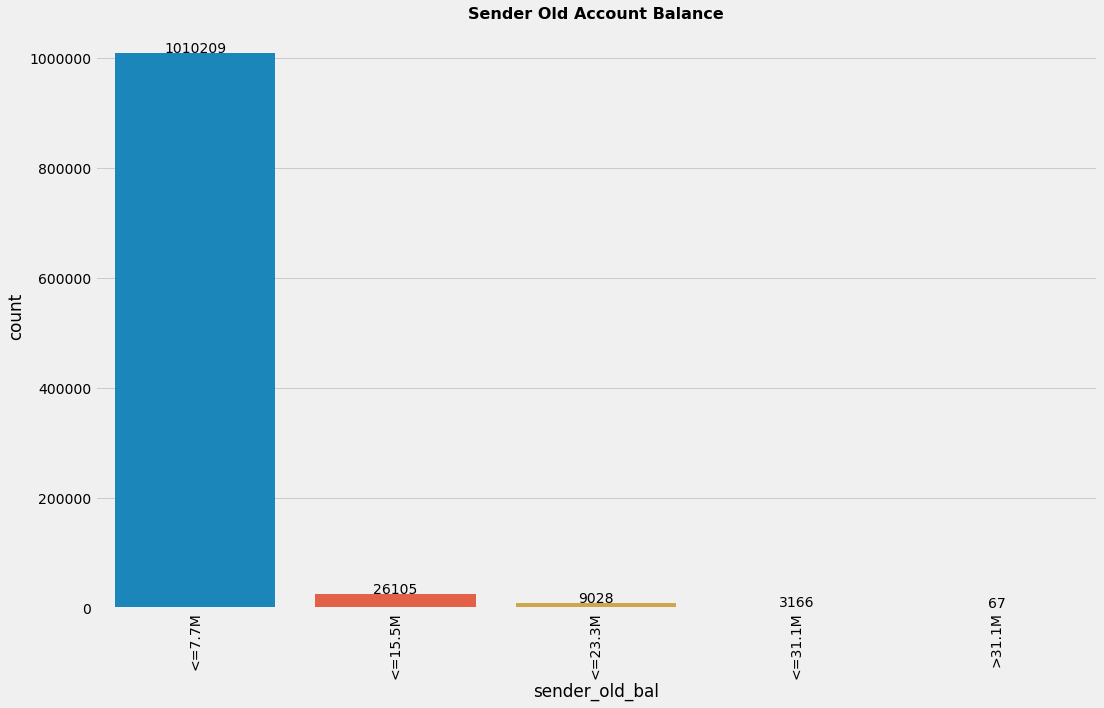

In [45]:
# Visualising Old Account Balance

def old_bal(oldbalanceOrg):
    if oldbalanceOrg <= 7700000:
        return "<=7.7M"
    elif oldbalanceOrg <=15500000:
        return "<=15.5M"
    elif oldbalanceOrg <=23300000:
        return "<=23.3M"
    elif oldbalanceOrg <= 31100000:
        return "<=31.1M"
    else: 
        return ">31.1M"

    
# Create a new column for age category
df["sender_old_bal"] = df["oldbalanceOrg"].apply(old_bal)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "sender_old_bal", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Sender Old Account Balance', weight='bold').set_fontsize(16)

In [46]:
df.newbalanceOrig.describe()

count    1.048575e+06
mean     8.938089e+05
std      3.008271e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.746000e+05
max      3.890000e+07
Name: newbalanceOrig, dtype: float64

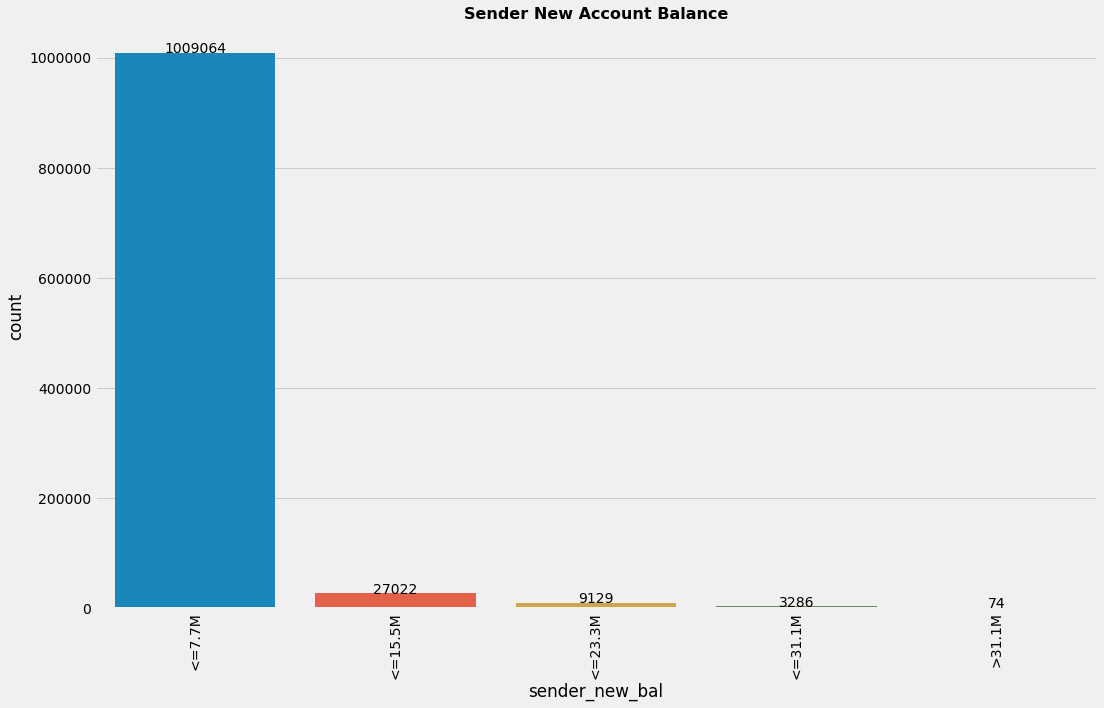

In [47]:
# Visualising Sender's New Account Balance

def new_bal(newbalanceOrig):
    if newbalanceOrig <= 7700000:
        return "<=7.7M"
    elif newbalanceOrig <=15500000:
        return "<=15.5M"
    elif newbalanceOrig <=23300000:
        return "<=23.3M"
    elif newbalanceOrig <= 31100000:
        return "<=31.1M"
    else: 
        return ">31.1M"

    
# Create a new column for age category
df["sender_new_bal"] = df["newbalanceOrig"].apply(new_bal)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "sender_new_bal", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Sender New Account Balance', weight='bold').set_fontsize(16)

#### Receiver's Old & New Account Balances

In [48]:
# Old Balance

In [49]:
df.oldbalanceDest.min()

0.0

In [50]:
df.oldbalanceDest.max()

42100000.0

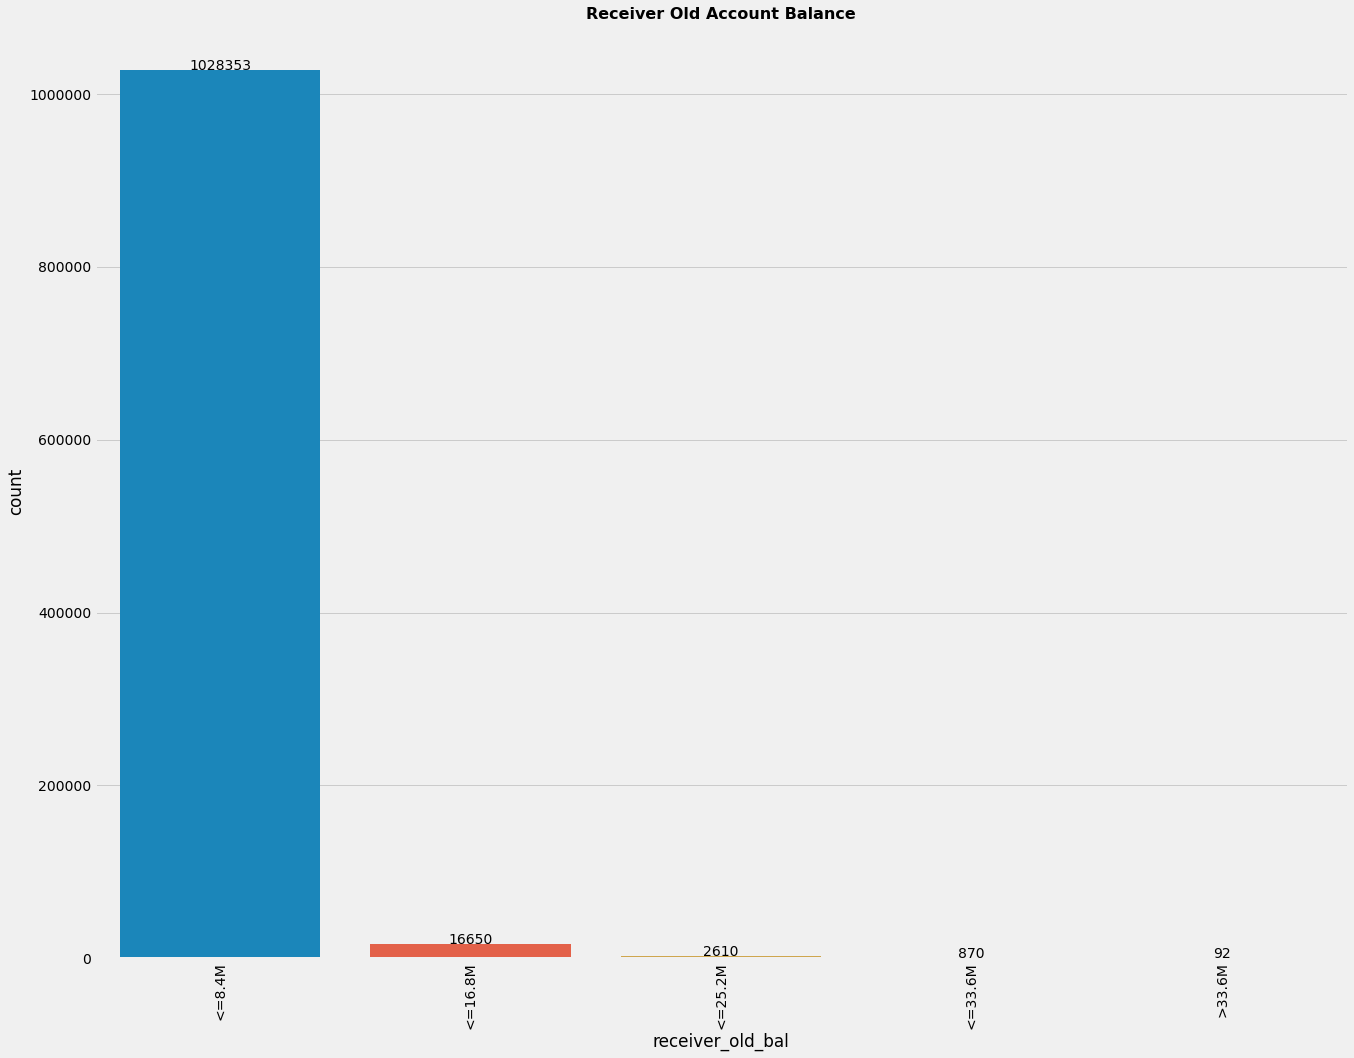

In [51]:
# Visualising Receiver's Old Account Balance

def oldbal(oldbalanceDest):
    if oldbalanceDest <= 8400000:
        return "<=8.4M"
    elif oldbalanceDest <=16800000:
        return "<=16.8M"
    elif oldbalanceDest <=25200000:
        return "<=25.2M"
    elif oldbalanceDest <= 33600000:
        return "<=33.6M"
    else: 
        return ">33.6M"

    
# Create a new column for age category
df["receiver_old_bal"] = df["oldbalanceDest"].apply(oldbal)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "receiver_old_bal", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Receiver Old Account Balance', weight='bold').set_fontsize(16)

In [52]:
#New Balance

In [53]:
df.newbalanceDest.min()

0.0

In [54]:
df.newbalanceDest.max()

42200000.0

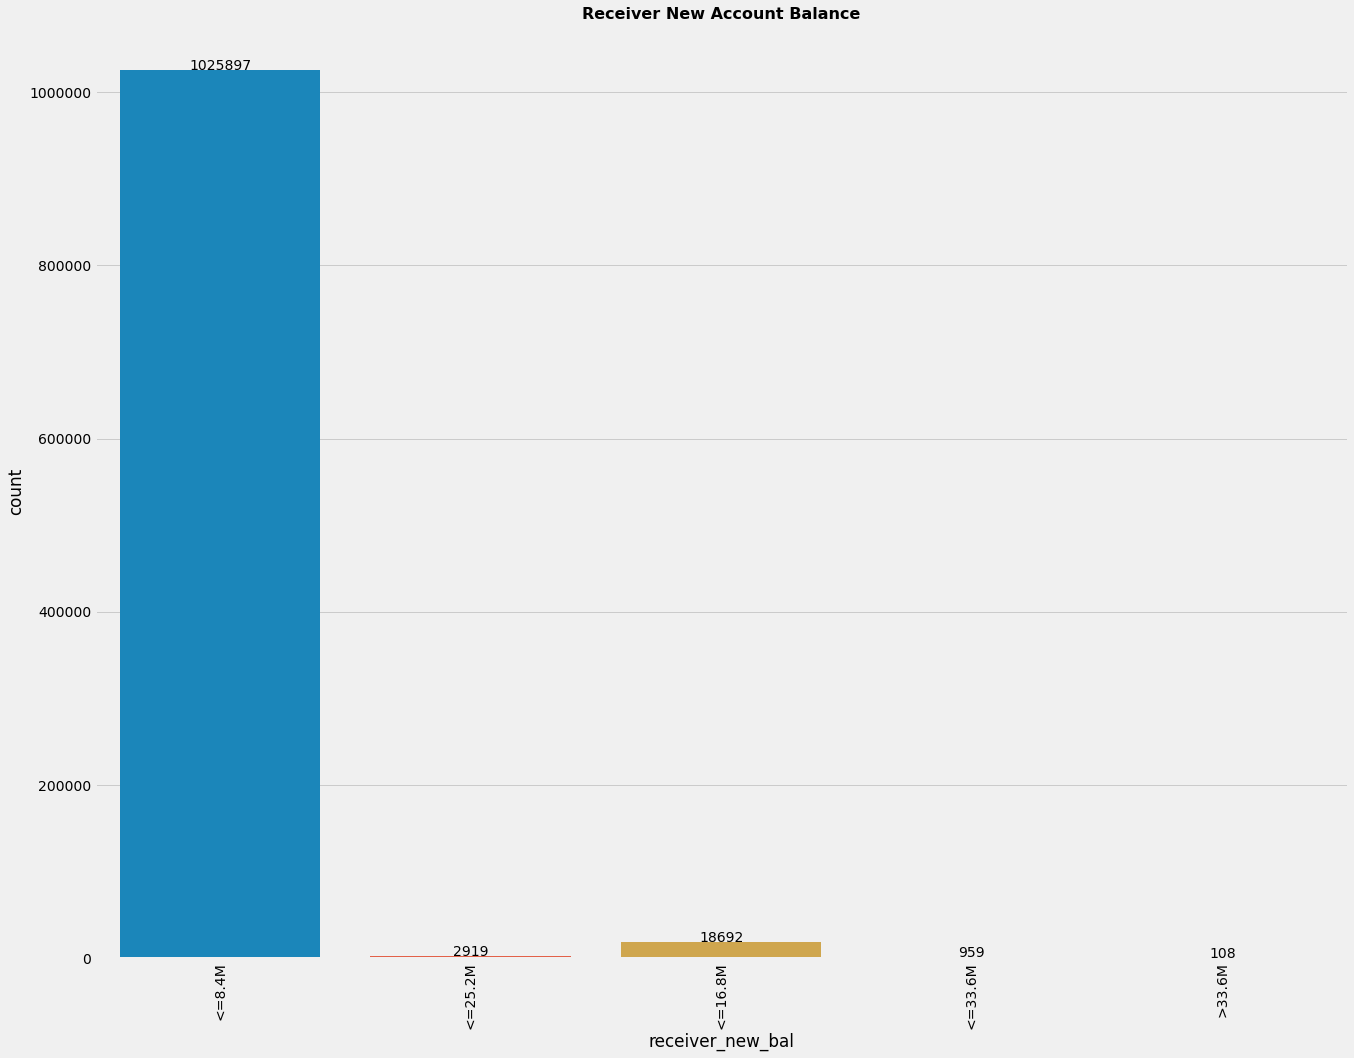

In [55]:
# Visualising Receiver's New Account Balance

def newbal(newbalanceDest):
    if newbalanceDest <= 8400000:
        return "<=8.4M"
    elif newbalanceDest <=16800000:
        return "<=16.8M"
    elif newbalanceDest <=25200000:
        return "<=25.2M"
    elif newbalanceDest <= 33600000:
        return "<=33.6M"
    else: 
        return ">33.6M"

    
# Create a new column for age category
df["receiver_new_bal"] = df["newbalanceDest"].apply(newbal)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "receiver_new_bal", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Receiver New Account Balance', weight='bold').set_fontsize(16)

#### Fraud Detected Visualization

In [56]:
df.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

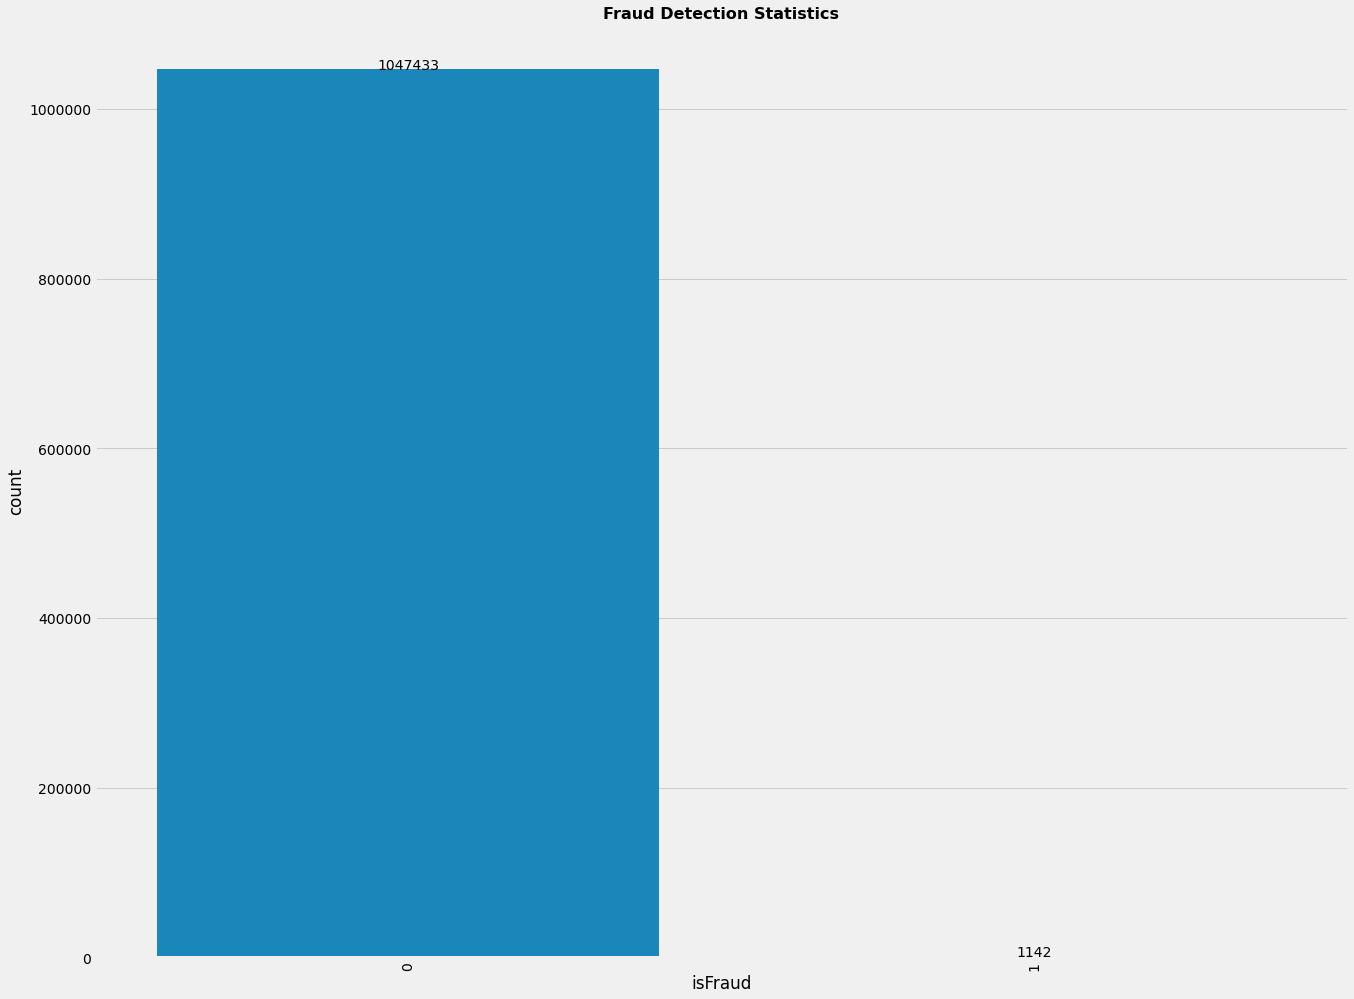

In [57]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "isFraud", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Fraud Detection Statistics', weight='bold').set_fontsize(16)

From all the recorded transactions, the fraud percentage is just 0.1% of all recorded transactions within the dataset.

#### Time Step Grouping

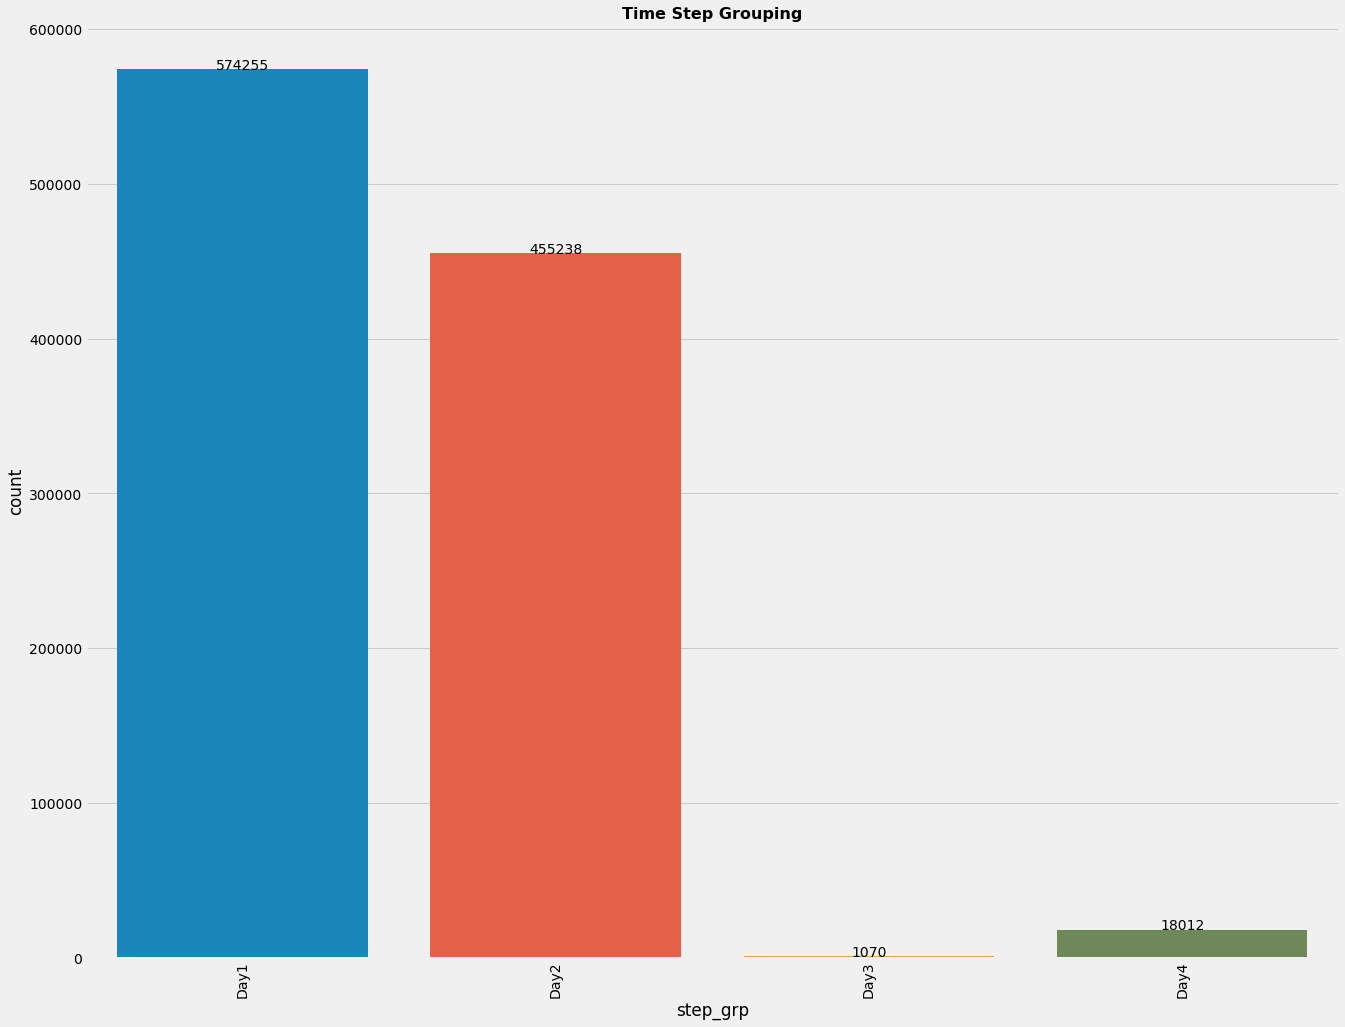

In [58]:
# grouping of time_step

def step(time_step):
    if time_step <= 24:
        return "Day1"
    elif time_step <= 48:
        return "Day2"
    elif time_step <= 72:
        return "Day3"
    elif time_step <= 96:
        return "Day4"
    else: 
        return ">96"

    
# Create a new column for age category
df["step_grp"] = df["time_step"].apply(step)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "step_grp", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Time Step Grouping', weight='bold').set_fontsize(16)

This actually makes sense, because a transaction can take 4 days. Also, its worthy of note that most transactions are actually completed within 24 hrs. 

In [59]:
df.step_grp.value_counts()

Day1    574255
Day2    455238
Day4     18012
Day3      1070
Name: step_grp, dtype: int64

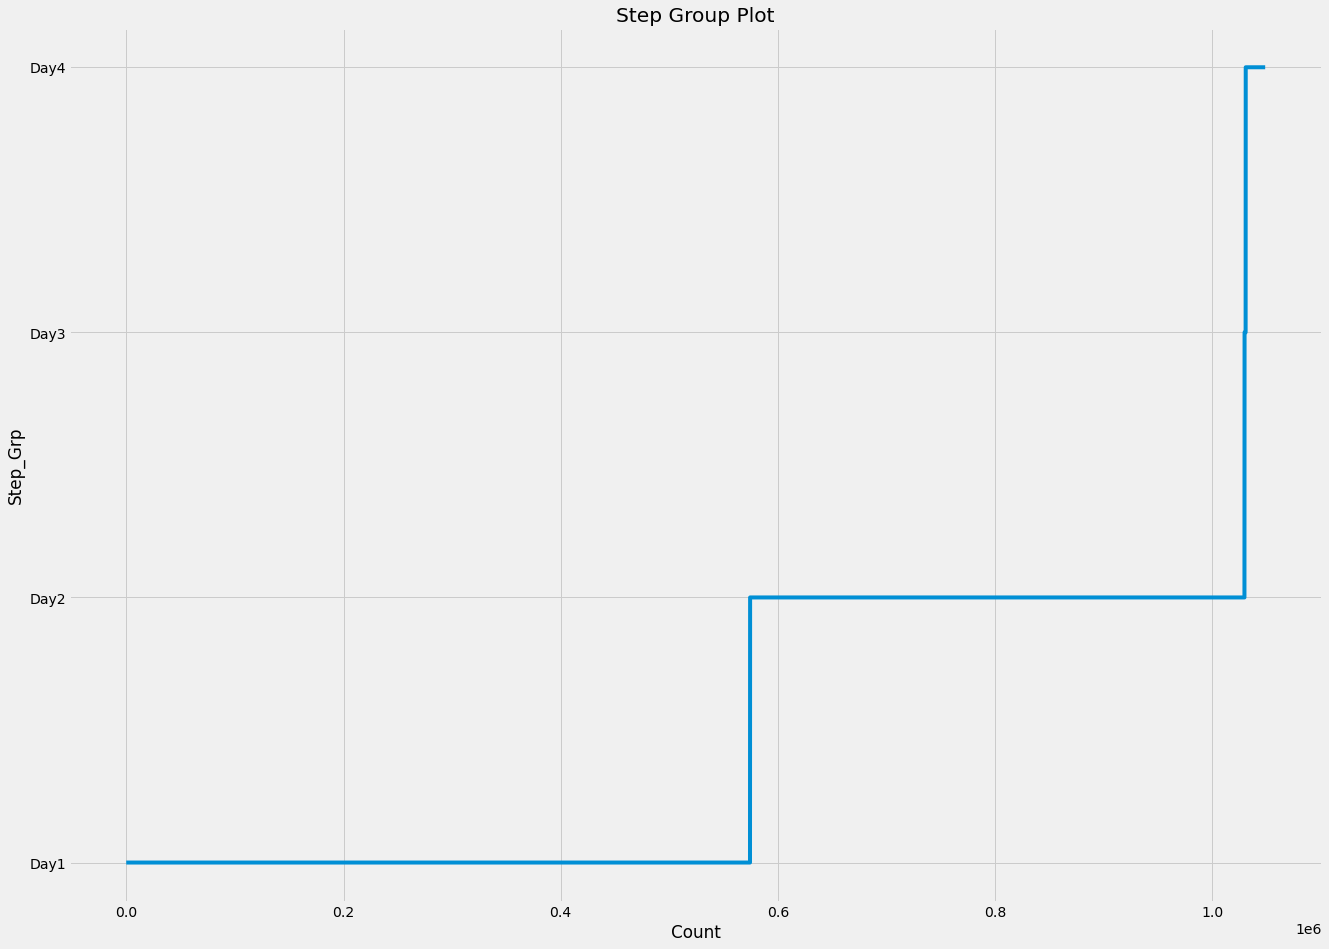

In [60]:
#Drawing a line plot to visualize the time_step column distribution
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(20, 15))
 
# Labelling the axes and setting
# a title
plt.xlabel("Count")
plt.ylabel("Step_Grp")
plt.title("Step Group Plot")
 
# plotting the "A" column alone
plt.plot(df["step_grp"])

This is a better line graph compared to the first; for example, the day 2 zone begins at a point seemingly 574255.

## Bivariate Analysis

#### Transaction Type vs Transaction Amount

In [61]:
df.head()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,transact_amount_grp,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,step_grp
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1


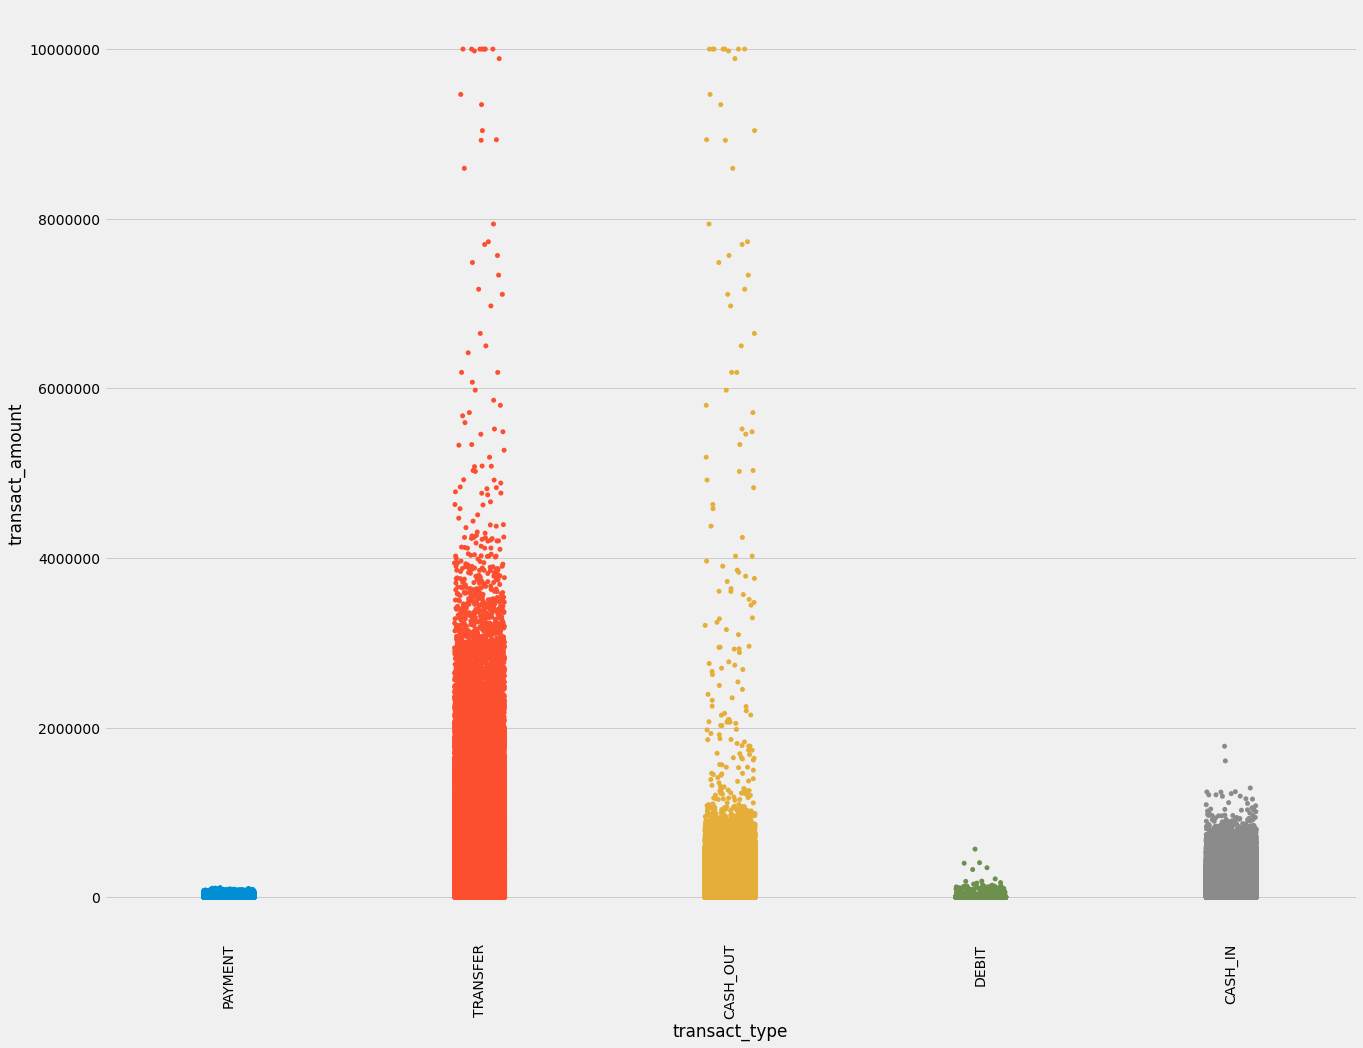

In [62]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax =ax1, x = "transact_type", y = "transact_amount" , data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Transaction Type vs Transaction Amount', weight='bold').set_fontsize(16)

The least transactions amounts is with the PAYMENT & DEBIT.

#### Time Step vs Transaction Type

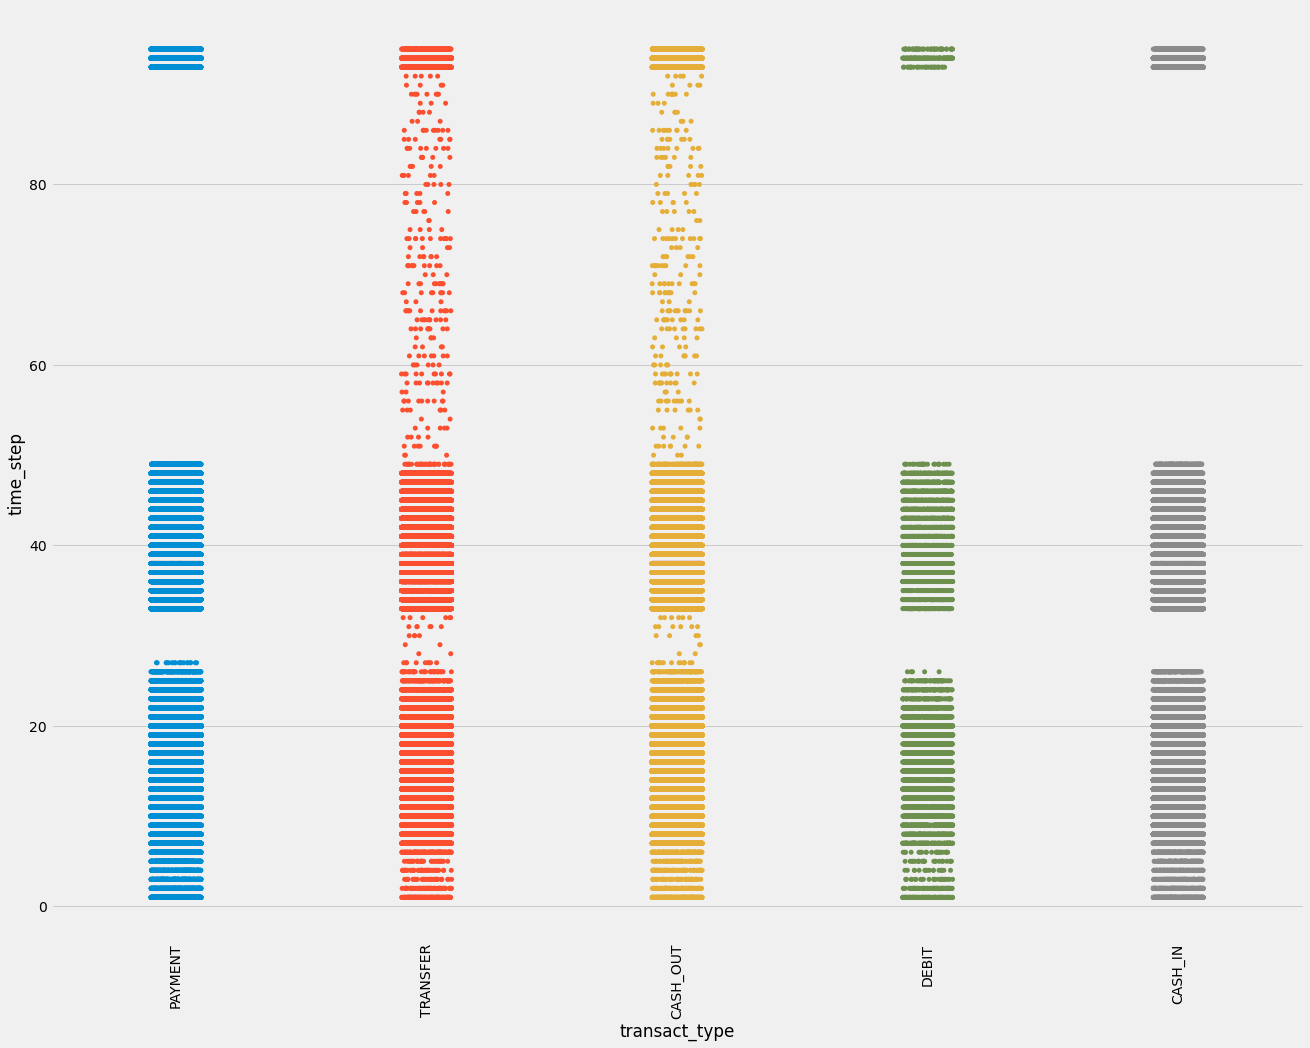

In [63]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax =ax1, x = "transact_type", y = "time_step" , data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Transaction Type vs Time Step', weight='bold', fontsize = 16)

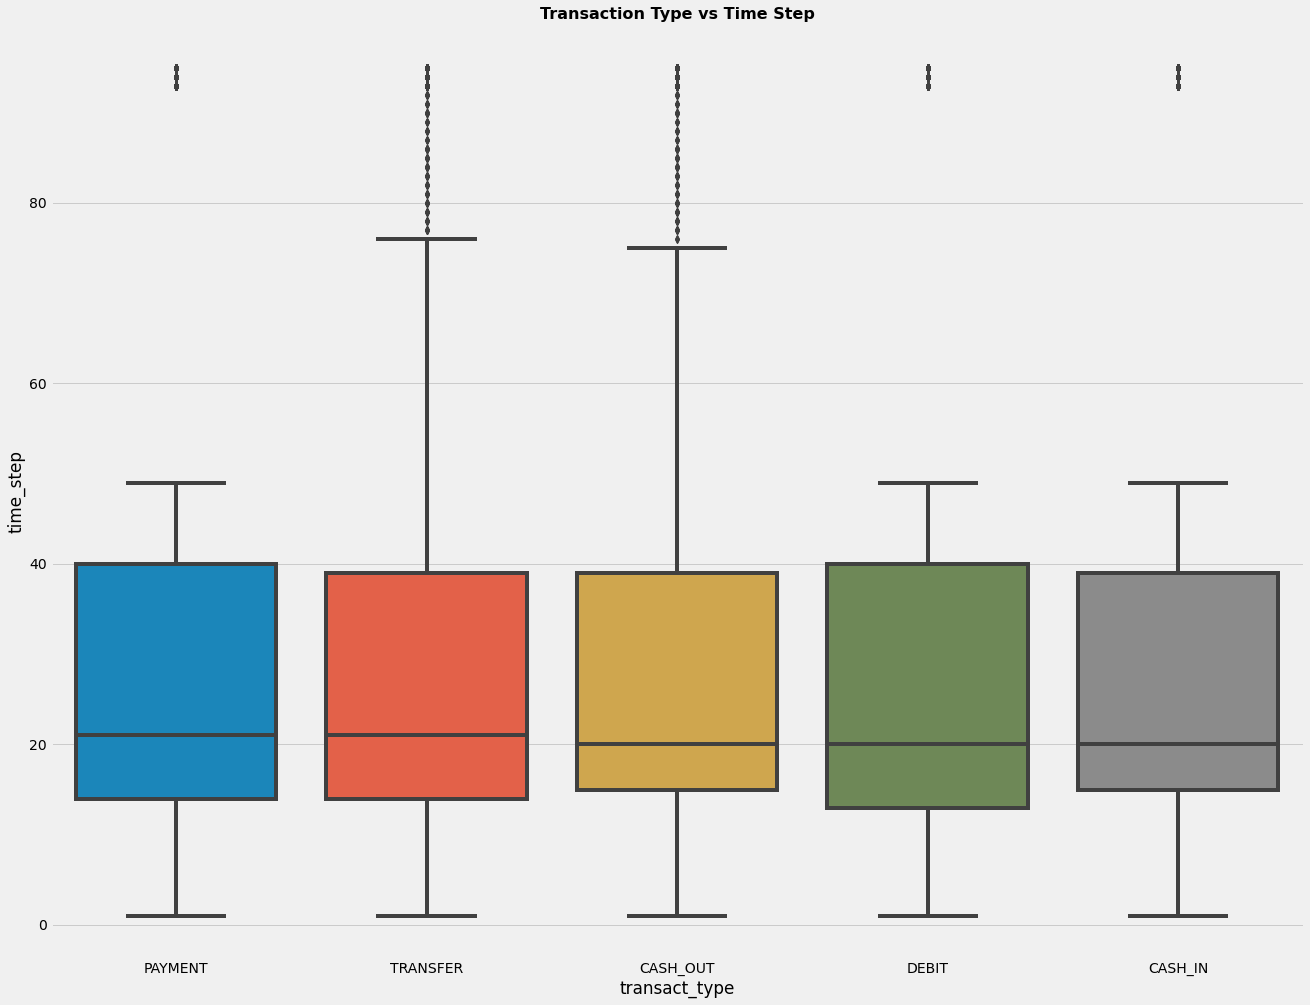

In [64]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
ax = sns.boxplot(x = "transact_type", y = "time_step" , data = df)
plt.title('Transaction Type vs Time Step', weight='bold', fontsize = 16)
plt.show(ax)

In [65]:
df[['time_step', 'transact_type']].head()

,time_step,transact_type
0,1,PAYMENT
1,1,PAYMENT
2,1,TRANSFER
3,1,CASH_OUT
4,1,PAYMENT


The `strip plot` is used to explain a little more details what the `boxplot` alone cannot. For example,

- the lines between the quartile and the min or max values of the boxplot are represented with empty spaces on the strip plot.
- even the topmost outliers of the boxplot are accounted for on the strip plot
- Transfer & Cash Out transaction types are most prevalent between pending transactions of day 2 and day 4.

#### Transaction Amount vs Time Step

In [66]:
df.time_step.describe()

count    1.048575e+06
mean     2.696617e+01
std      1.562325e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.000000e+01
75%      3.900000e+01
max      9.500000e+01
Name: time_step, dtype: float64

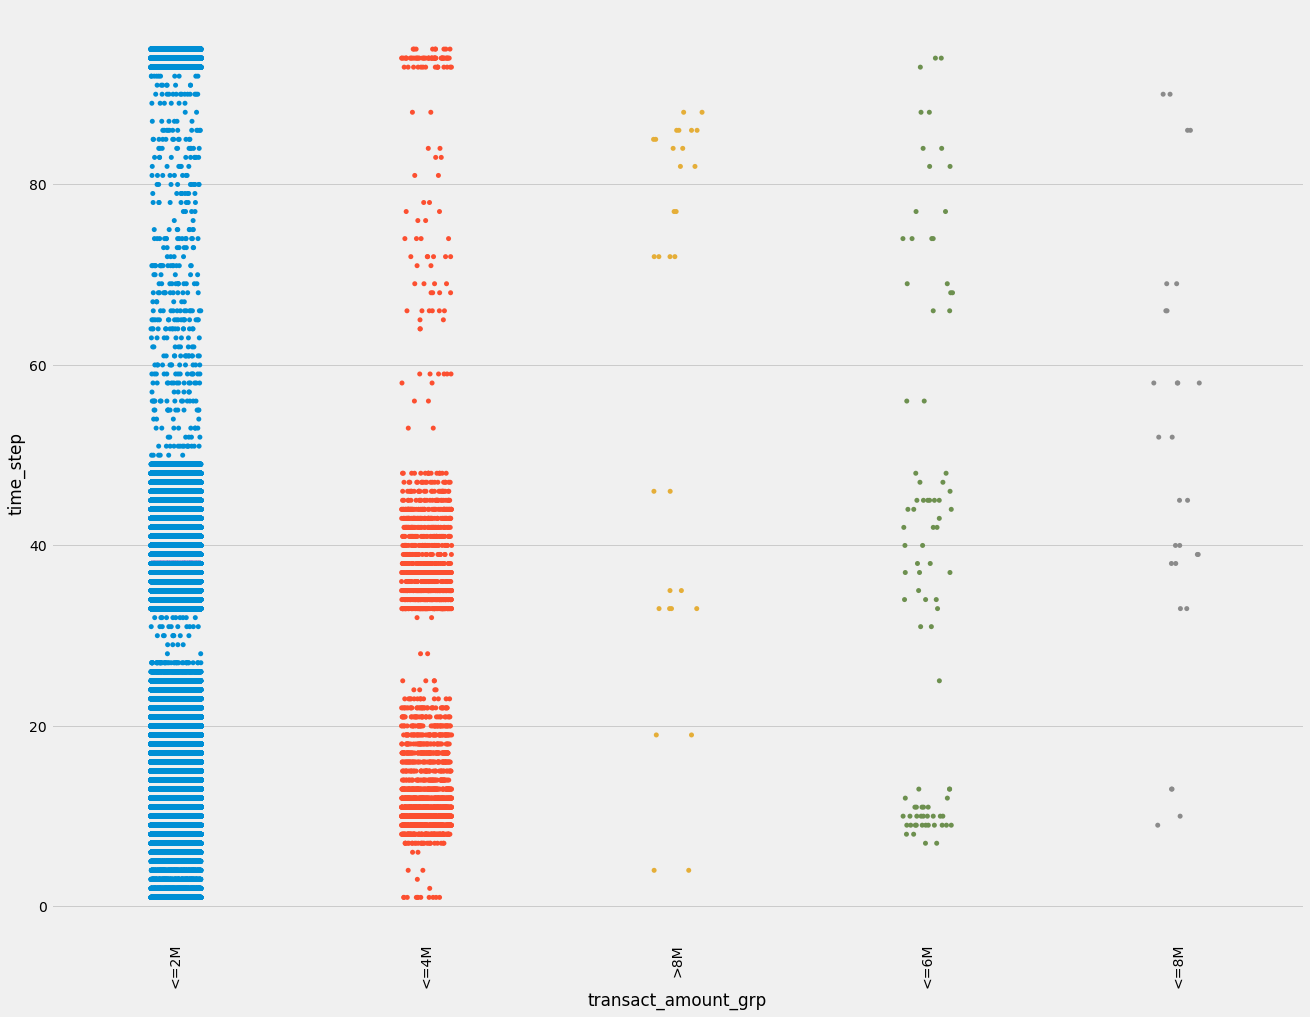

In [67]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax =ax1, x = "transact_amount_grp", y = "time_step" , data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Transaction Amount Group vs Time Step', weight='bold', fontsize = 16)

Text(0.5, 1.0, 'Transaction Amount Group vs Time Step')

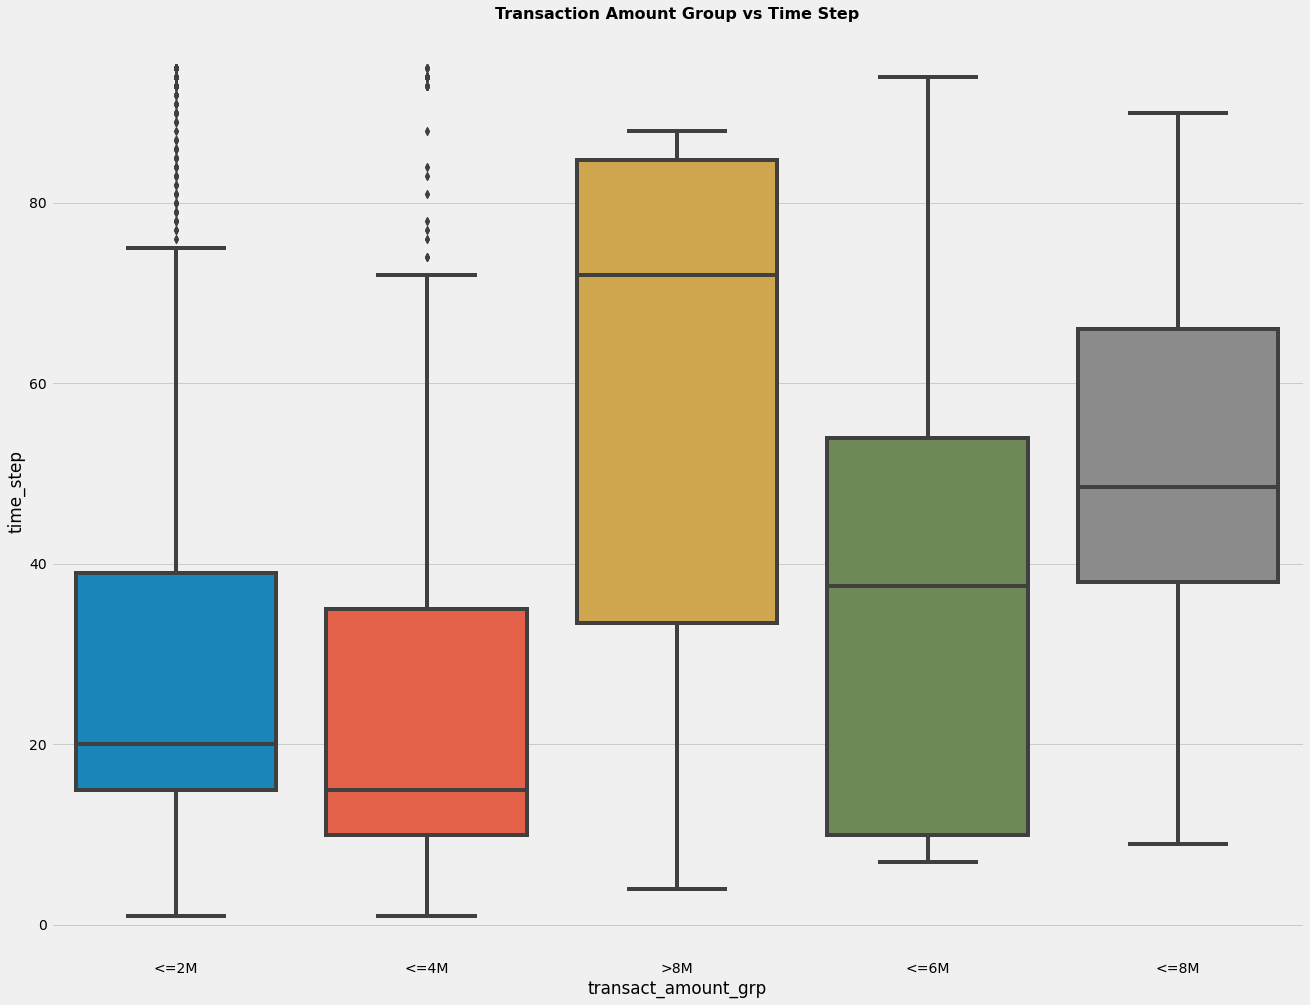

In [68]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
ax = sns.boxplot(ax =ax1, x = "transact_amount_grp", y = "time_step" , data = df)
plt.title('Transaction Amount Group vs Time Step', weight='bold', fontsize = 16)

Most of the transactions with amounts greater than 8 million tend to delay for more than a day.

<AxesSubplot:xlabel='transact_amount_grp', ylabel='time_step'>

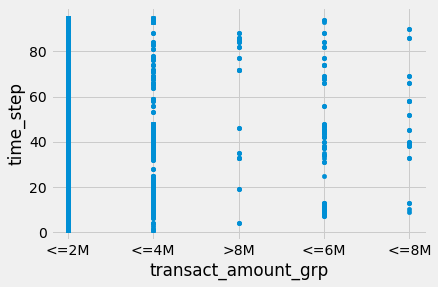

In [69]:
df.plot.scatter(x='transact_amount_grp', y='time_step')

<Figure size 1440x1152 with 0 Axes>

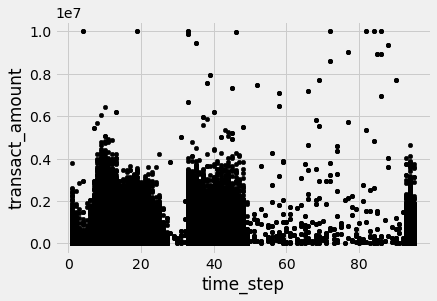

In [70]:
plt.figure(figsize=(20,16))
ax = df.plot.scatter(x="time_step", y= "transact_amount", color="black", s=20)


Text(0.5, 1.0, 'Transaction Amount Group vs Time Step')

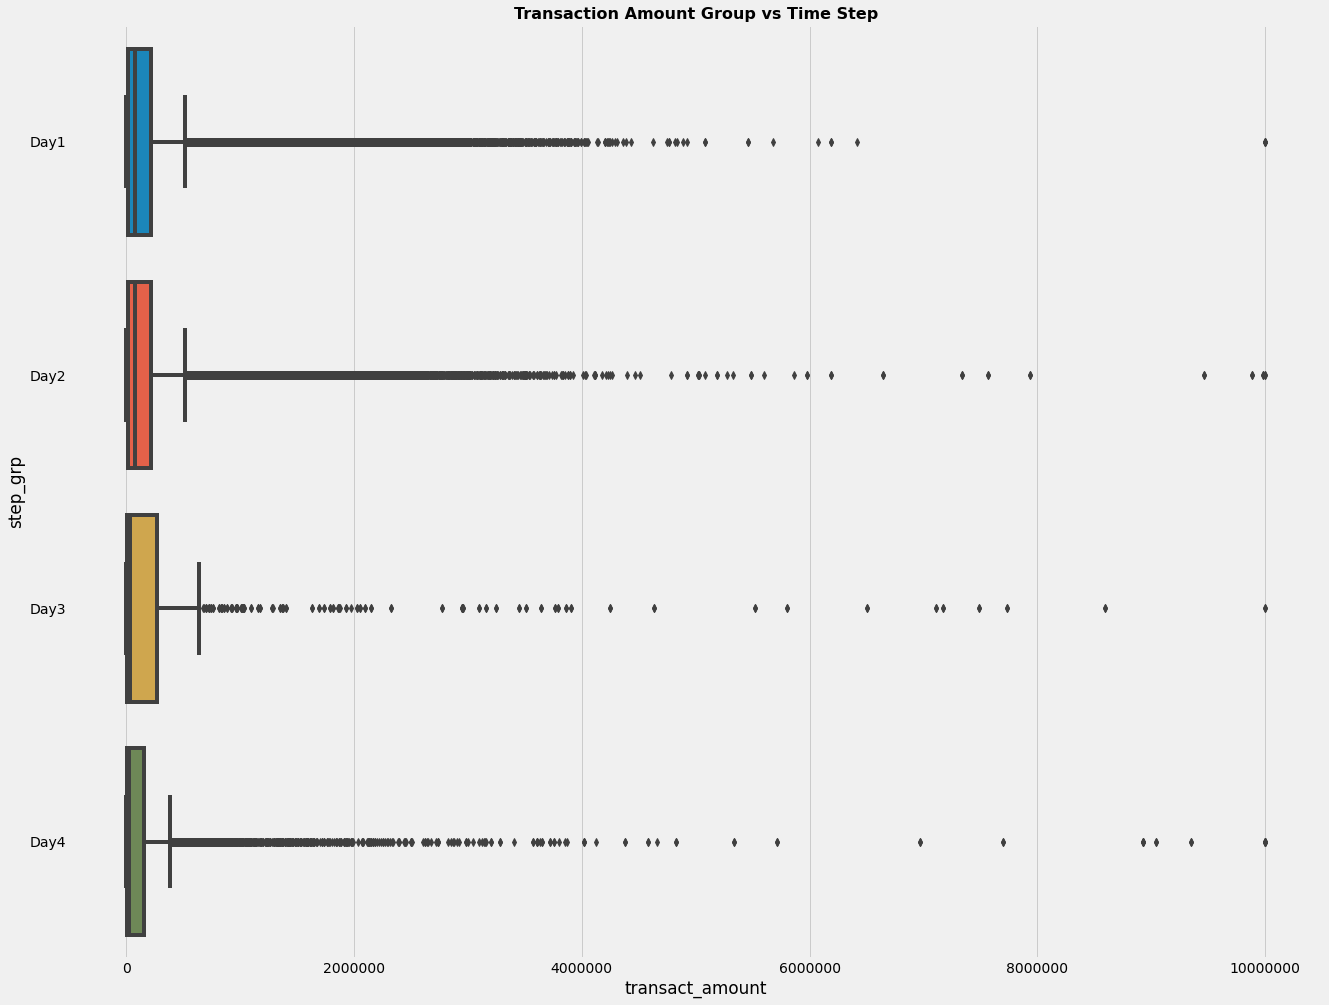

In [71]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
ax = sns.boxplot(ax =ax1, y = "step_grp", x = "transact_amount" , data = df)
plt.title('Transaction Amount Group vs Time Step', weight='bold', fontsize = 16)

Text(0.5, 1.0, 'Transaction Amount Group vs Time Step')

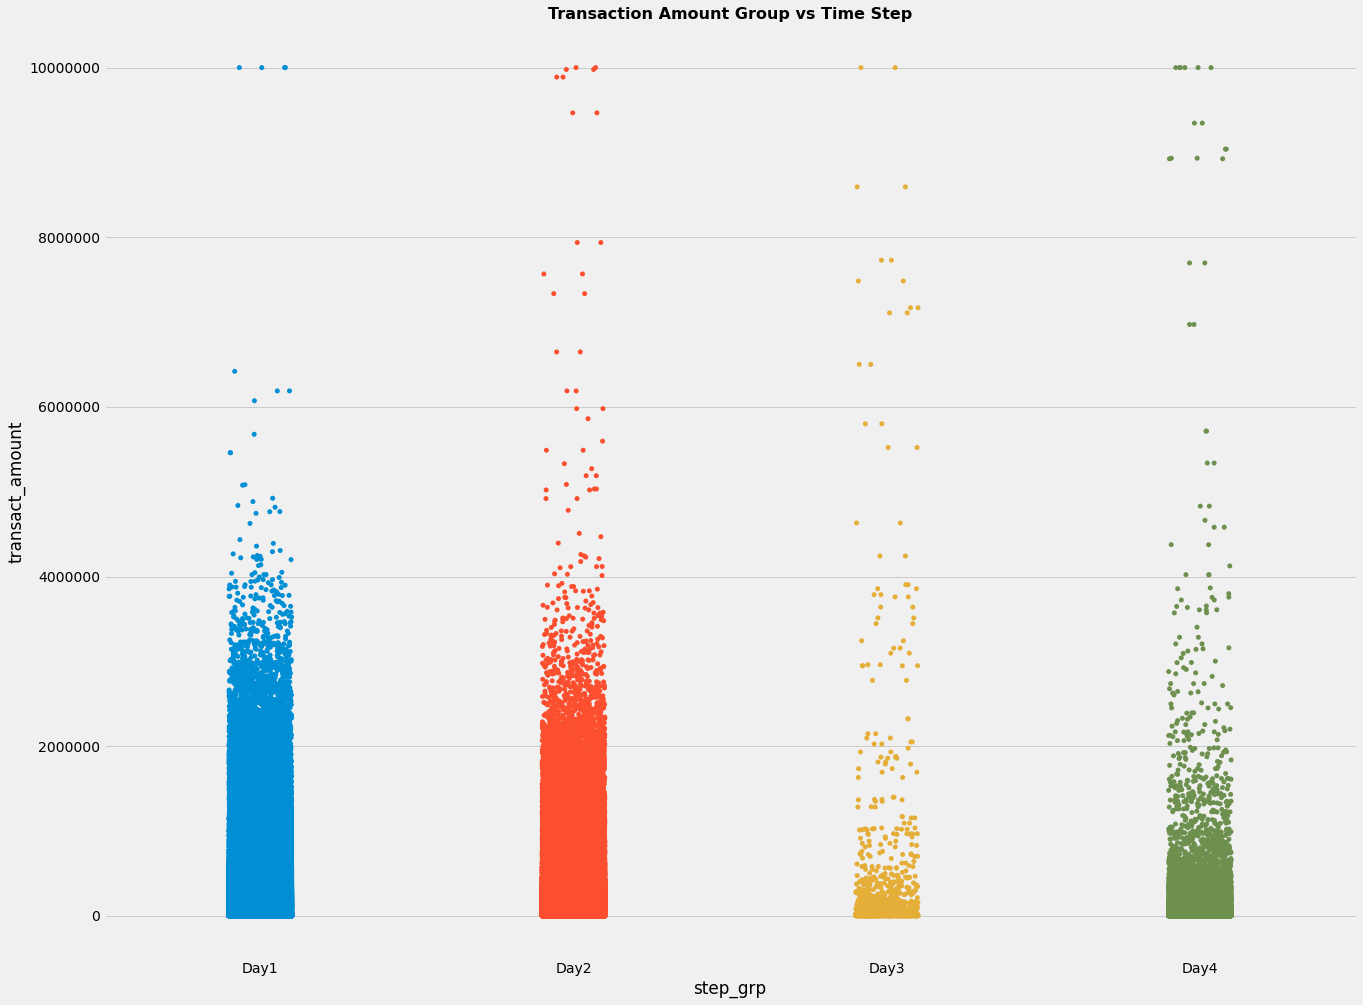

In [72]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
ax = sns.stripplot(ax =ax1, x = "step_grp", y = "transact_amount" , data = df)
plt.title('Transaction Amount Group vs Time Step', weight='bold', fontsize = 16)

This time, I grouped the time step and used the ungrouped transaction amounts; 
- this strip plot further visualizes how more transactions over 8 million pend for more than a day.

#### Step_Grp vs Fraud

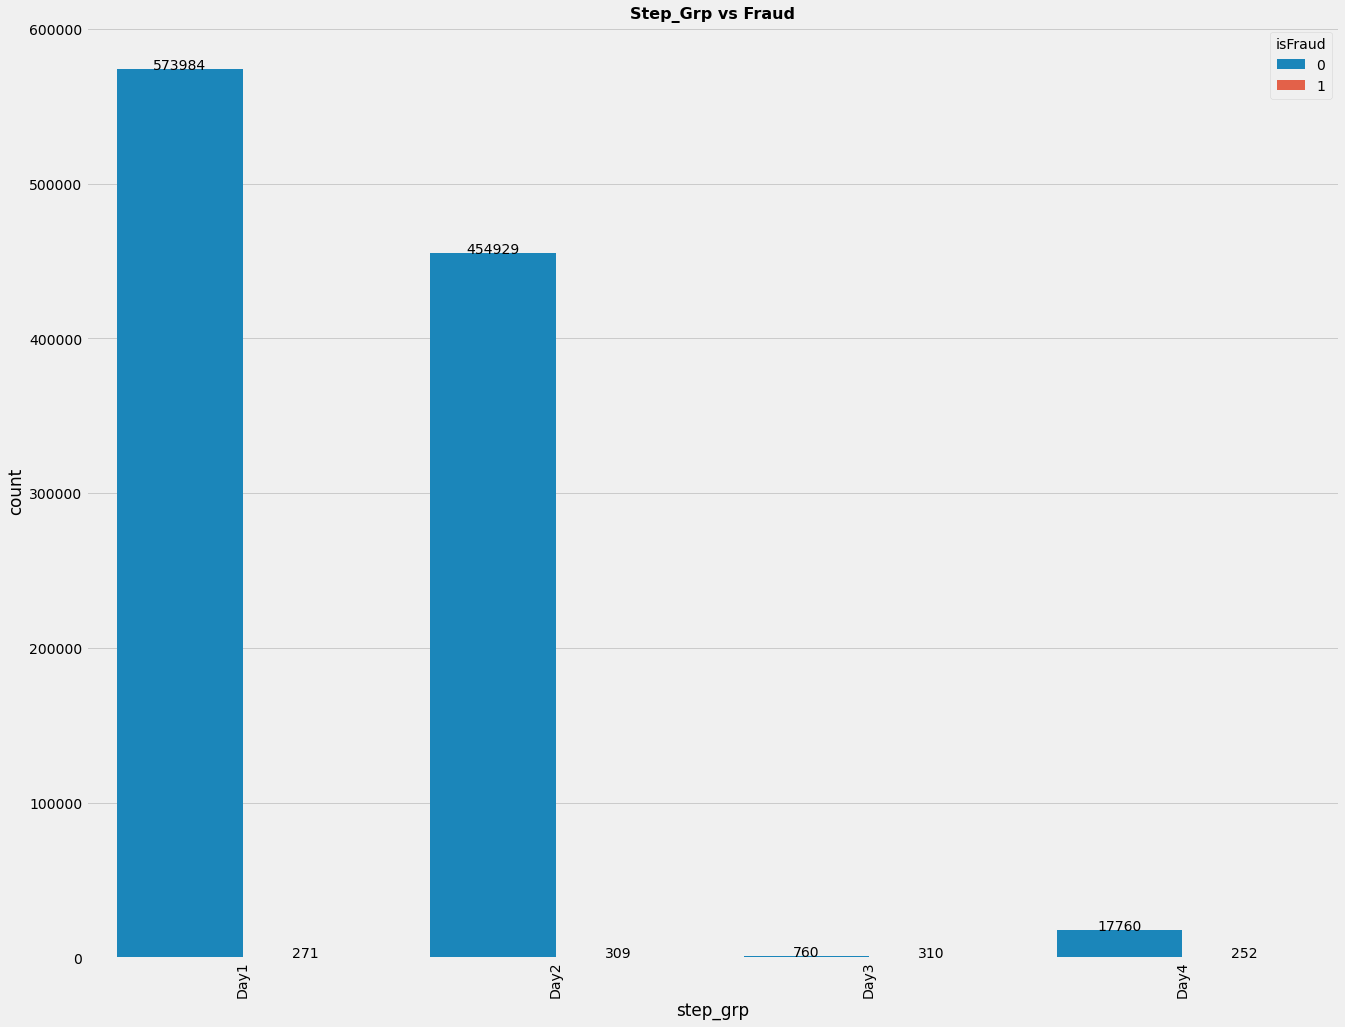

In [73]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "step_grp" , hue = "isFraud" , data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Step_Grp vs Fraud', weight='bold', fontsize = 16)

Most fraudulent transactions were carried out on day 2 and 3. 

- Day 4, has the least theft assignment.

## Multivariate Analysis

In [74]:
df.head()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,transact_amount_grp,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,step_grp
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1


#### Transaction_amount_grp vs Time_step vs isFraud

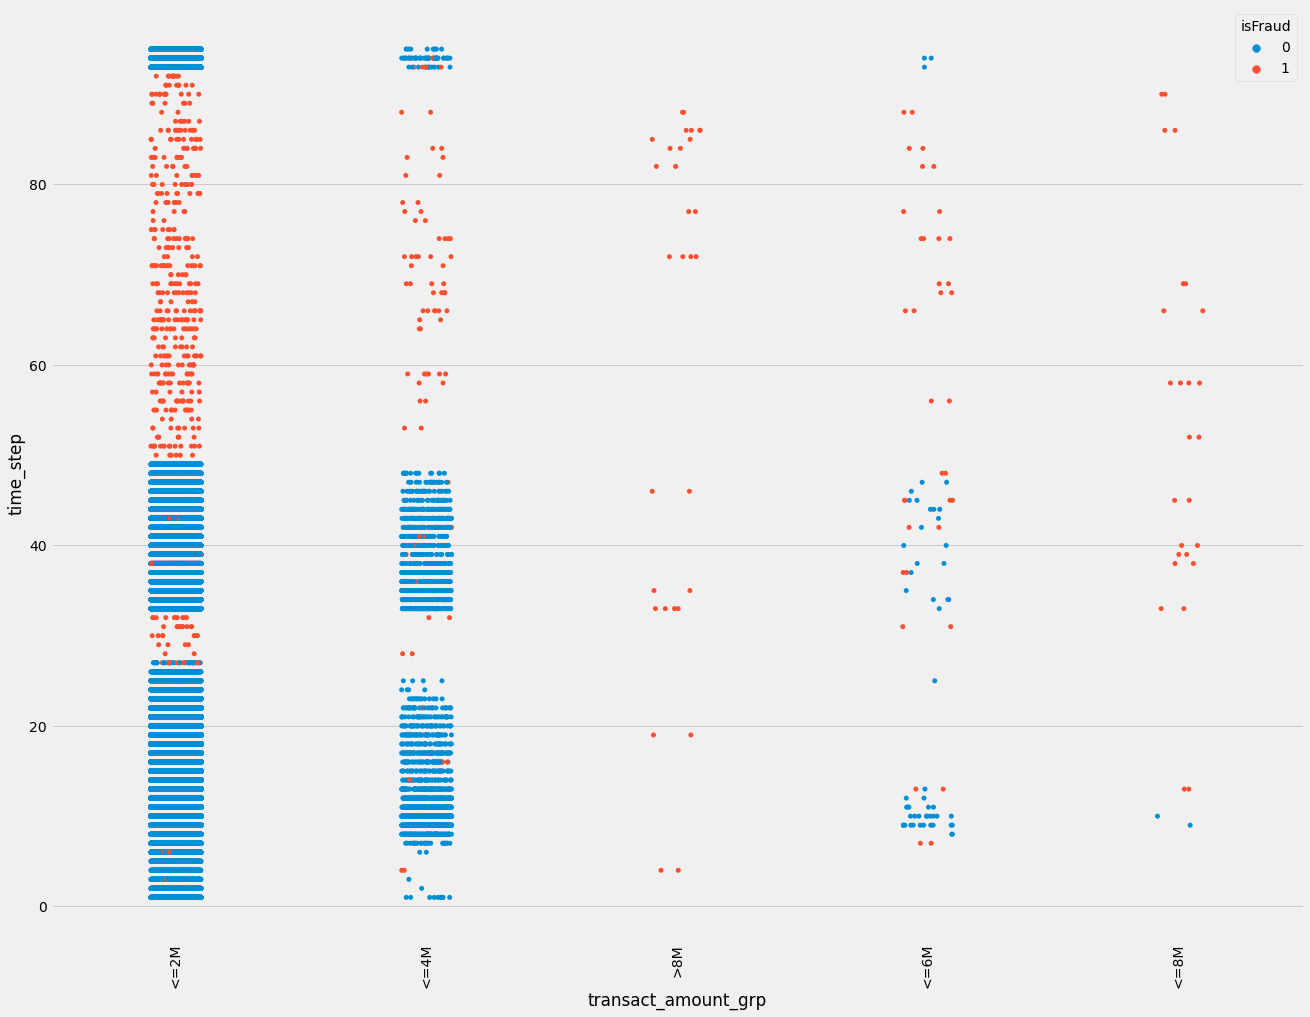

In [75]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax =ax1, x = "transact_amount_grp", y = "time_step" , hue = "isFraud", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Transaction Amount Group vs Time Step', weight='bold', fontsize = 16)

In [76]:
df.transact_amount_grp.value_counts()['>8M']

30

All 30 transactions over 8 million have been flagged as fraudulent.

Text(0, 0.5, 'Time_Step')

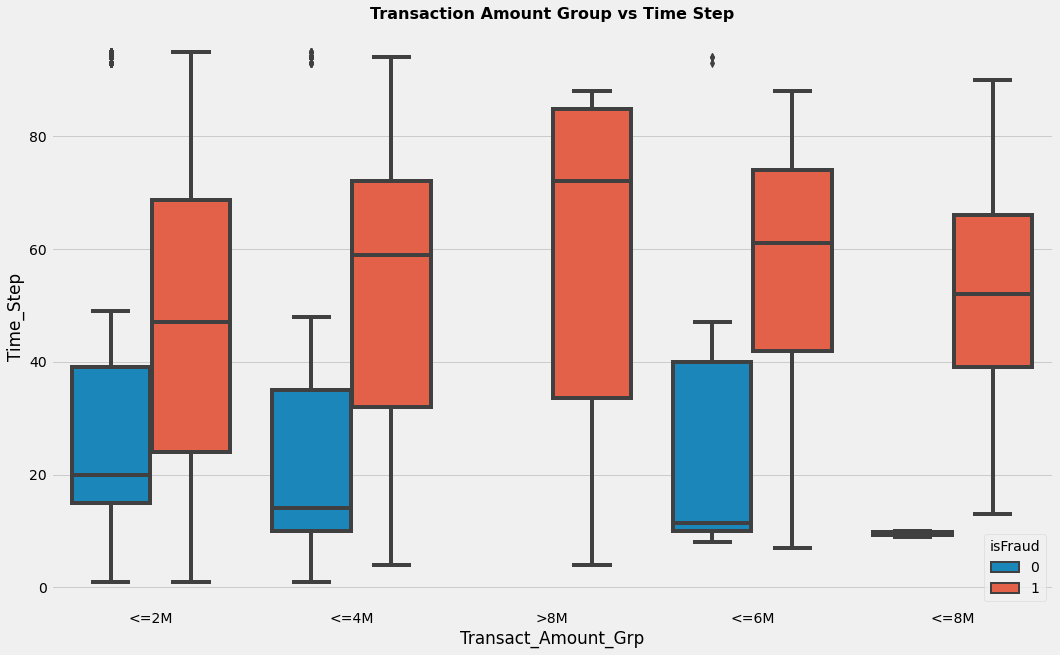

In [77]:
# MULTIVARIATE
# Boxplot visualization to compare and gain meaningful insight from the strip plot
plt.figure(figsize=(16,10))
sns.boxplot(x= 'transact_amount_grp', y = 'time_step', hue = 'isFraud', data = df)
plt.title('Transaction Amount Group vs Time Step', weight='bold', fontsize = 16)
plt.xlabel('Transact_Amount_Grp')
plt.ylabel('Time_Step')

#### Transaction Type vs Time Step with Fraud as hue

Text(0, 0.5, 'Time_Step')

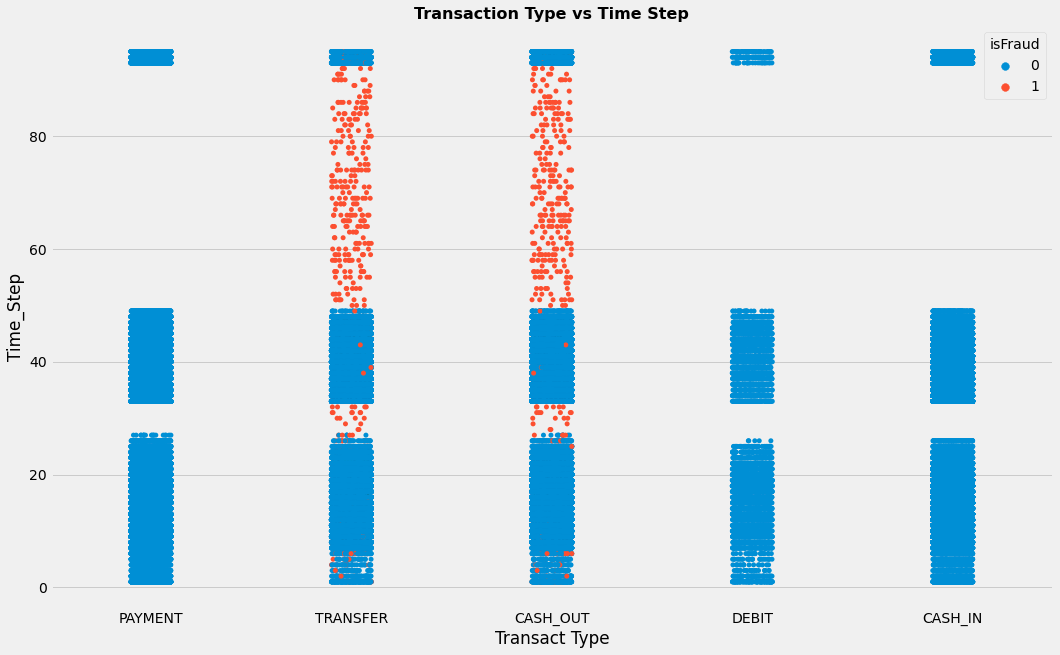

In [78]:
# stripplot visualization to compare and gain meaningful insight from the strip plot
plt.figure(figsize=(16,10))
sns.stripplot(x= 'transact_type', y = 'time_step', hue = 'isFraud', data = df)
plt.title('Transaction Type vs Time Step', weight='bold', fontsize = 16)
plt.xlabel('Transact Type')
plt.ylabel('Time_Step')

#### Transaction Amount vs Step Grp with Fraud as Hue

Text(0, 0.5, 'Transact Amount')

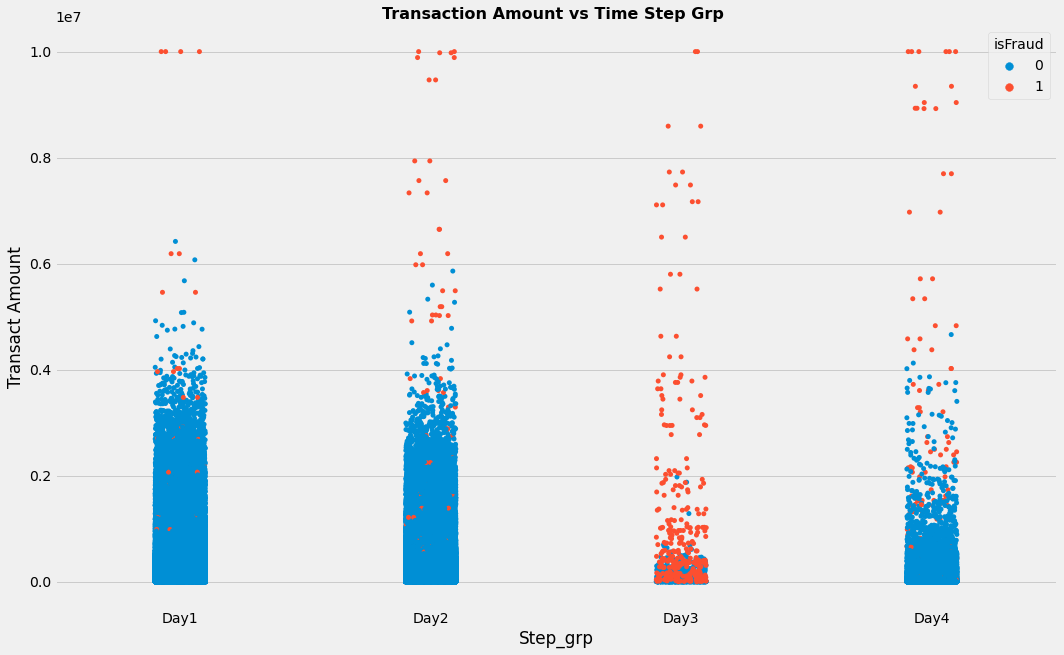

In [79]:
# stripplot visualization to compare and gain meaningful insight from the strip plot
plt.figure(figsize=(16,10))
sns.stripplot(y= 'transact_amount', x = 'step_grp', hue = 'isFraud', data = df)
plt.title('Transaction Amount vs Time Step Grp ', weight='bold', fontsize = 16)
plt.xlabel('Step_grp')
plt.ylabel('Transact Amount')

In [80]:
df.transact_amount.value_counts()

10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: transact_amount, Length: 1009606, dtype: int64

In [81]:
df.transact_amount.value_counts()[10000000]

14

#### Pairplot

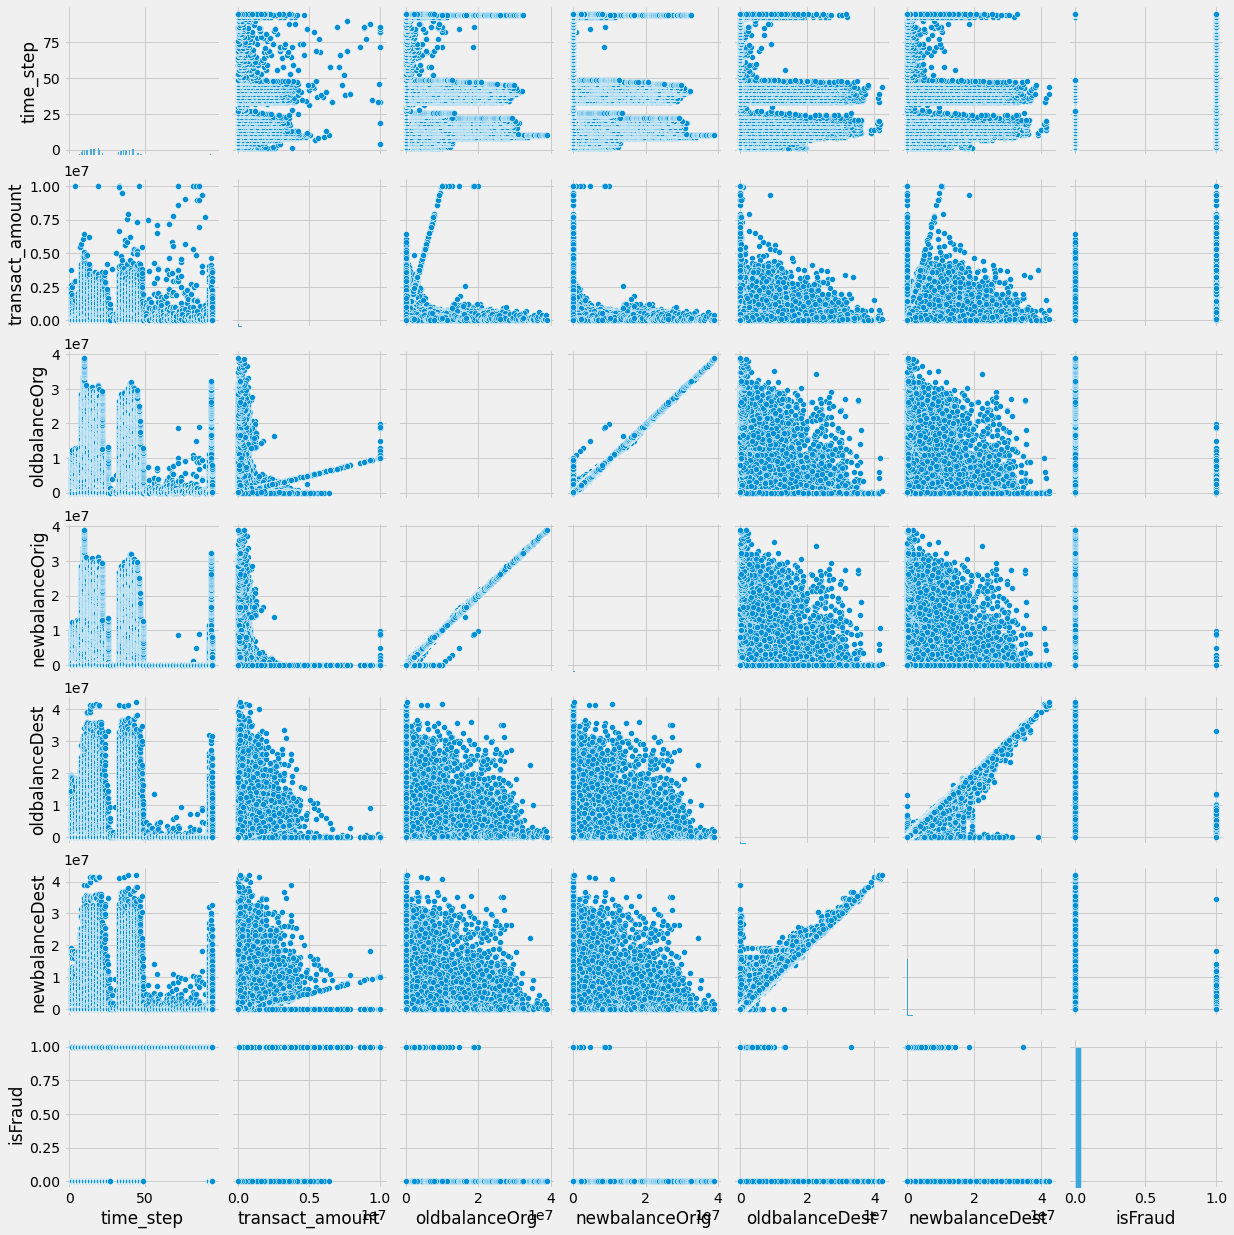

In [82]:
sns.pairplot(df)

#### Correlation

In [83]:
df.corr()

,time_step,transact_amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
time_step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
transact_amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

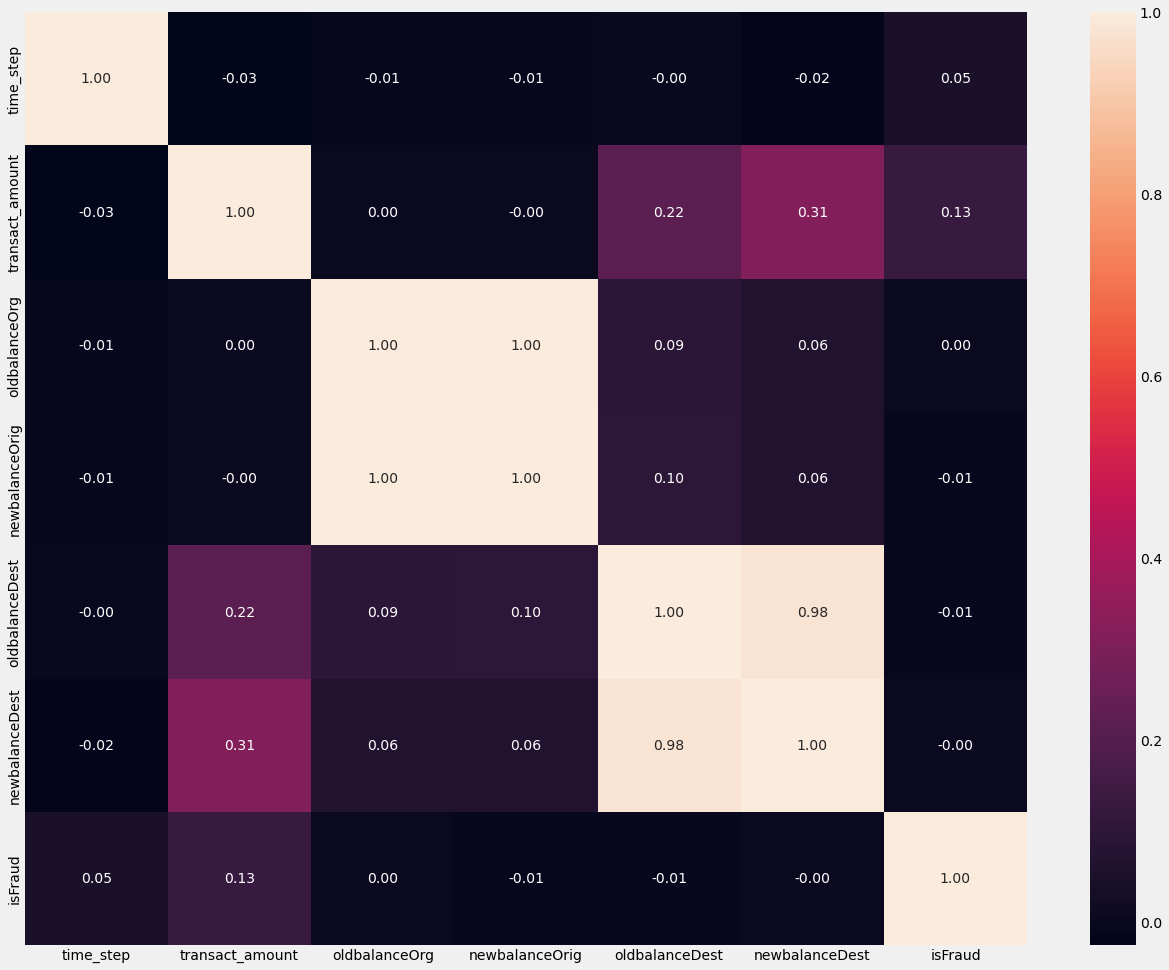

In [84]:
#Correlation
corel = df.corr()
fig, ax = plt.subplots(figsize=(20,16)) 
sns.heatmap(corel, annot=True, fmt='.2f')

## EDA Summary


1. The time_step column was grouped into days to visualize the full transaction data per day; since we were only originally given an hourly perspective.
 - by doing this, we are able to see the whole daily transaction data of the bank.


2. The transaction type vs transaction amount curve shows us, that most customers at Blossom Bank prefer `transfer or cash out transactions.`


3. Transaction amount, transaction type and time step columns are positively correlated with the Fraud table.



4. Transactions delayed beyond 24 steps (24 hrs or 1 day), have a tendency of being caused by fraud.
  
 - the most frequent fraud detected were on transactions that took 2 or 3 days.


5. Transactions over 6 million are most likely fraudulent also.


6. There are no null values in the dataset.




## Action Points

- Transfer or Cash_out transactions pending beyond 2 days should raise an alarm or at least be scrutinized carefully.

## Fraud Detection Modelling 

In [85]:
df.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [86]:
#Choosing Target Column

y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [87]:
df.head()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,transact_amount_grp,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,step_grp
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1


In [88]:
#Selecting categorical columns
df.columns

Index(['time_step', 'transact_type', 'transact_amount', 'nameOrig',
       'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'transact_amount_grp', 'sender_old_bal',
       'sender_new_bal', 'receiver_old_bal', 'receiver_new_bal', 'step_grp'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   time_step            1048575 non-null  int64  
 1   transact_type        1048575 non-null  object 
 2   transact_amount      1048575 non-null  float64
 3   nameOrig             1048575 non-null  object 
 4   oldbalanceOrg        1048575 non-null  float64
 5   newbalanceOrig       1048575 non-null  float64
 6   nameDest             1048575 non-null  object 
 7   oldbalanceDest       1048575 non-null  float64
 8   newbalanceDest       1048575 non-null  float64
 9   isFraud              1048575 non-null  int64  
 10  transact_amount_grp  1048575 non-null  object 
 11  sender_old_bal       1048575 non-null  object 
 12  sender_new_bal       1048575 non-null  object 
 13  receiver_old_bal     1048575 non-null  object 
 14  receiver_new_bal     1048575 non-null  object 
 15

In [90]:
features = ['transact_type']

In [91]:
# Using pd.get_dummies() for one hot encoding
category_dummies = pd.get_dummies(df[features])
category_dummies.head()

,transact_type_CASH_IN,transact_type_CASH_OUT,transact_type_DEBIT,transact_type_PAYMENT,transact_type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [92]:
#Joining One-Hot coded columns to the main dataframe with pd.concat
df = pd.concat([df, category_dummies], axis=1)
df.head()

,time_step,transact_type,transact_amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,step_grp,transact_type_CASH_IN,transact_type_CASH_OUT,transact_type_DEBIT,transact_type_PAYMENT,transact_type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Day1,0,0,0,1,0


In [93]:
#Dropping the original categorical columns 
columns = ['transact_type', 'nameOrig', 'nameDest', 'transact_amount_grp', 'sender_old_bal',
       'sender_new_bal', 'receiver_old_bal', 'receiver_new_bal', 'step_grp']

df = df.drop(columns, axis=1)
df.head()

,time_step,transact_amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transact_type_CASH_IN,transact_type_CASH_OUT,transact_type_DEBIT,transact_type_PAYMENT,transact_type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### Selecting Features for Training

In [94]:
# To pick the features with which to train the dataset, we'd need to remove the target - y(isFraud)
X = df.drop('isFraud', axis=1)

X.head()

,time_step,transact_amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transact_type_CASH_IN,transact_type_CASH_OUT,transact_type_DEBIT,transact_type_PAYMENT,transact_type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


## Importing & Initializing ML Algorithms 

In [95]:
#import ML algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm



# Ml metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To disbale warning
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Create an instance of the model
LR= LogisticRegression()
KN = KNeighborsClassifier()
RF = RandomForestClassifier()
SVM = svm.LinearSVC()

In [97]:
models = [LR,KN,RF,SVM]

# Train_Test_Split

In [98]:
# Split into training and testing with split ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale the training and testing set

Logistic regression does very well with scaled data, hence we'd need to import a Standard Scalar from the sklearn library.

In [99]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

In [100]:
#data scaling steps for train dataset
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [101]:
#data scaling steps for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

# Training & Testing Model

In [102]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


For LogisticRegression, Accuracy score is 0.9991846076818539 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       0.94      0.32      0.48       245

    accuracy                           1.00    209715
   macro avg       0.97      0.66      0.74    209715
weighted avg       1.00      1.00      1.00    209715



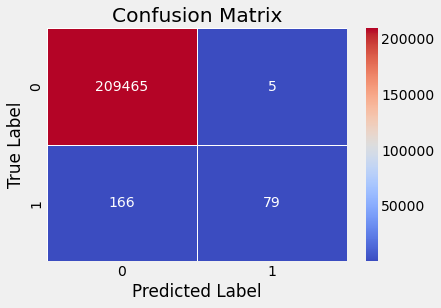


For KNeighborsClassifier, Accuracy score is 0.9994420999928474 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       0.97      0.54      0.69       245

    accuracy                           1.00    209715
   macro avg       0.99      0.77      0.85    209715
weighted avg       1.00      1.00      1.00    209715



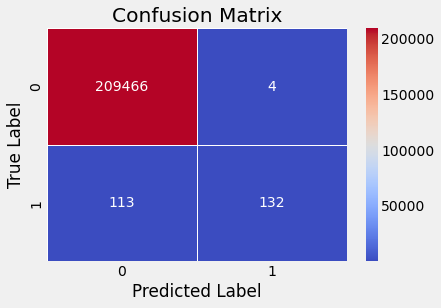


For RandomForestClassifier, Accuracy score is 0.9998092649548196 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       1.00      0.84      0.91       245

    accuracy                           1.00    209715
   macro avg       1.00      0.92      0.96    209715
weighted avg       1.00      1.00      1.00    209715



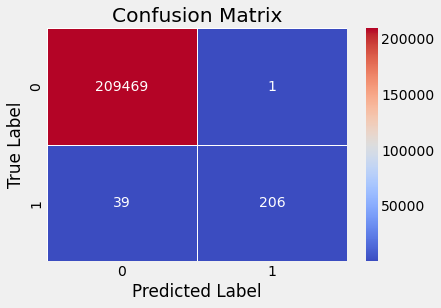


For LinearSVC, Accuracy score is 0.9991750709295949 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       0.96      0.31      0.46       245

    accuracy                           1.00    209715
   macro avg       0.98      0.65      0.73    209715
weighted avg       1.00      1.00      1.00    209715



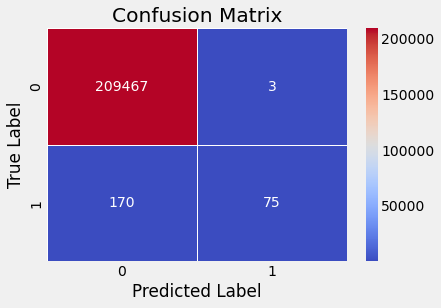

In [103]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
    #fit the model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

## Model Cross Validation

Cross validation enables the model to split the training data into multiple blocks with n-number of iterations. It selects a block and utilizes it as the test set. 
- The next iteration would pick another block of the data and use as the test set.

This gives you an idea of how the model will perform when it is exposed to new data it hasn't seen before; hence it is more capable to tackle real life situations.

In [104]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


For LogisticRegression, Accuracy score is 0.9991846076818539 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       0.94      0.32      0.48       245

    accuracy                           1.00    209715
   macro avg       0.97      0.66      0.74    209715
weighted avg       1.00      1.00      1.00    209715



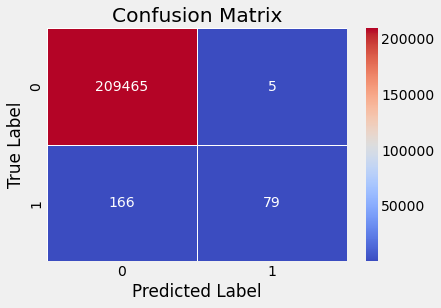


For KNeighborsClassifier, Accuracy score is 0.9994420999928474 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       0.97      0.54      0.69       245

    accuracy                           1.00    209715
   macro avg       0.99      0.77      0.85    209715
weighted avg       1.00      1.00      1.00    209715



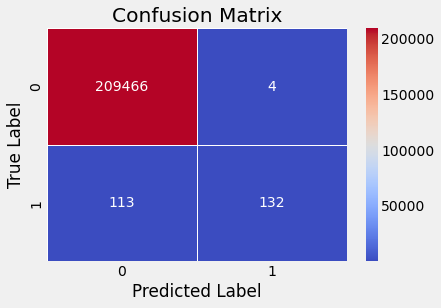


For RandomForestClassifier, Accuracy score is 0.9998092649548196 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       1.00      0.84      0.91       245

    accuracy                           1.00    209715
   macro avg       1.00      0.92      0.96    209715
weighted avg       1.00      1.00      1.00    209715



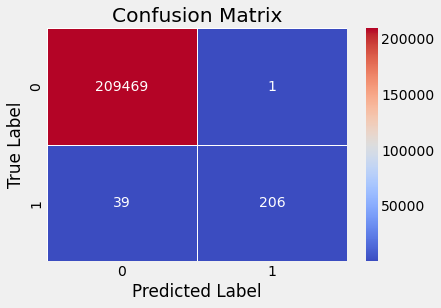


For LinearSVC, Accuracy score is 0.9991750709295949 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209470
           1       0.95      0.31      0.47       245

    accuracy                           1.00    209715
   macro avg       0.97      0.66      0.73    209715
weighted avg       1.00      1.00      1.00    209715



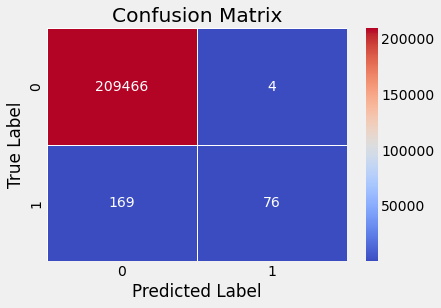

In [105]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    
    score = ['accuracy', 'precision', 'recall']
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1)
    
    # report performance
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

##  Results Interpretation

Interpreting results based on accuracy score, precision and recall confusion matrix metric.

- The `accuracy scores` tells us how accurate our model is, but it is usually only considered when the target class (y) outcome is balanced. 
 
 - In this dataset, the ratio of fraudulent transactions to non-fraudulent transactions is 1047433:1142 respectively. 
 
 - Hence, using only accuracy to evaluate our model will not be a good idea as the model with be biased and make accurate predictions about the larger part of the dataset.


- `Precision` measures how many junk positive predictions of fraud was made during the transaction. And because having a false postive isn't costly to the bank, it will not be the metric with which we predict fraudulent tendencies of transactions.


- `Recall` on the other hand, is considered when you have to correctly predict an event that has occured already. And the recall rate is penalized whenever a False Negative is predicted.

 - this is because, if the bank authorizes a fraudulent transaction because the model couldn't detect that it was, it could cost them their integrity, and/or ward off new customers.



## Summary

What model do I suggest?

From analysing the models based on the recall-confusion matrix metric, the model that should be deployed is the `Random Forest Classifier model`; because it has the highest recall score (lowest number of false negatives) compared to other algorithms. 

